In [2]:
import time
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('subscribers.csv')
#column index
data.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [4]:

len(data['subid'].round().unique())

227628

In [5]:

data['package_type'].unique()

array(['economy', 'base', 'enhanced', nan], dtype=object)

In [6]:

data['num_weekly_services_utilized'].unique()

array([nan,  3.,  4.,  2.,  5.,  6.,  7.,  8.,  1.,  9.,  0., 10., 14.])

In [7]:

data['preferred_genre'].unique()

array(['comedy', 'regional', 'drama', nan, 'other', 'international'],
      dtype=object)

In [8]:

data['intended_use'].unique()

array(['access to exclusive content', 'replace OTT',
       'expand regional access', 'supplement OTT',
       'expand international access', 'education', 'other', nan],
      dtype=object)

In [9]:

data['weekly_consumption_hour'].unique()

array([         nan,  22.95157947,  36.0011861 ,  20.05166689,
        34.5512298 ,  25.85149206,  28.75140464,  37.45114239,
        33.10127351,  30.20136093,  27.30144835,  21.50162318,
        24.40153577,  31.65131722,  38.90109868,  14.25184173,
        18.6017106 ,  41.80101126,  47.60083643,  40.35105497,
        17.15175431,  43.25096755,  44.70092384,  50.50074901,
         4.10214769,  15.70179802,  46.15088014,  11.35192914,
         9.90197285,  66.45026821,   7.00206027,  12.80188543,
        59.20048676,   2.6521914 ,  49.05079272,  62.10039934,
        -8.94745894,  54.85061788,   8.45201656,  65.00031192,
        72.25009338,  27.83365486,  -4.59759006,  51.9507053 ,
        57.75053047,  63.55035563,   5.55210398,  -0.24772119,
        53.40066159, -11.84737152, -10.39741523,  -7.49750264,
        26.04533445,  75.15000596,  22.32194881,  60.65044305,
        67.90022451,  21.03413515,  76.59996225,  56.30057418,
       -13.29732781,  26.12287802,  21.75657111,  24.25

In [10]:

data['num_ideal_streaming_services'].unique()

array([nan,  2.,  3.,  1.,  4.,  5.,  0., -1.,  7.])

In [11]:

data['age'].unique()

array([           nan, 7.00000000e+01, 2.50000000e+01, 3.00000000e+01,
       2.80000000e+01, 6.10000000e+01, 2.30000000e+01, 7.30000000e+01,
       7.10000000e+01, 5.30000000e+01, 2.40000000e+01, 5.70000000e+01,
       5.40000000e+01, 4.80000000e+01, 2.60000000e+01, 5.00000000e+01,
       3.20000000e+01, 6.50000000e+01, 3.10000000e+01, 2.10000000e+01,
       3.70000000e+01, 4.90000000e+01, 5.90000000e+01, 2.90000000e+01,
       3.50000000e+01, 2.00000000e+01, 6.30000000e+01, 3.90000000e+01,
       2.20000000e+01, 4.10000000e+01, 8.00000000e+01, 5.50000000e+01,
       4.30000000e+01, 4.20000000e+01, 6.00000000e+01, 5.80000000e+01,
       3.40000000e+01, 4.40000000e+01, 8.10000000e+01, 4.60000000e+01,
       5.20000000e+01, 5.60000000e+01, 4.00000000e+01, 5.10000000e+01,
       3.60000000e+01, 1.95500000e+03, 6.20000000e+01, 3.80000000e+01,
       4.50000000e+01, 1.95000000e+03, 6.80000000e+01, 6.70000000e+01,
       7.20000000e+01, 4.70000000e+01, 6.90000000e+01, 2.70000000e+01,
      

In [12]:
#drop nan
data['male_TF'].unique()

array([False, True, nan], dtype=object)

In [13]:
data['country'].unique()

array(['UAE'], dtype=object)

In [14]:
data['attribution_technical'].unique()

array(['facebook', 'organic', 'search', 'discovery', 'bing', 'email',
       'brand sem intent google', 'google_organic', 'display',
       'affiliate', 'brand sem intent bing', 'internal', 'pinterest',
       'other', 'youtube', 'facebook_organic', 'referral', 'email_blast',
       'podcast', 'vod', 'samsung', 'ott', 'bing_organic', 'direct_mail',
       'quora', 'appstore', 'criteo', 'pinterest_organic',
       'content_greatist', 'influencer', 'twitter', 'playstore', 'tv'],
      dtype=object)

In [15]:
data['attribution_survey'].unique()

array(['facebook', 'tv', 'youtube', 'search', 'referral', 'public_radio',
       'other', 'podcast', 'pinterest', nan, 'social_organic', 'ott',
       'facebook_organic', 'sirius xm', 'affiliate', 'amfm_radio',
       'direct_mail'], dtype=object)

In [16]:
data['months_per_bill_period'].unique()

array([4])

In [17]:
data['plan_type'].unique()

array(['base_uae_14_day_trial', 'high_uae_14_day_trial',
       'low_uae_no_trial', 'base_eur_14_day_trial',
       'high_aud_14_day_trial', 'high_sar_14_day_trial',
       'low_gbp_14_day_trial', 'low_eur_no_trial',
       'base_uae_no_trial_7_day_guarantee', 'low_sar_no_trial',
       'high_jpy_14_day_trial'], dtype=object)

In [89]:
data['monthly_price'].unique()

array([4.7343, 5.1013, 1.0643, 4.4407, 4.0003, 4.3673, 1.1744, 0.8074,
       4.6976])

In [18]:
data['discount_price'].unique()

array([4.5141, 5.0279, 1.0276, 4.2205, 3.7801, 4.0737, 4.3673, 1.1744,
       4.4407, 0.7707])

In [19]:
data['account_creation_date'].unique()
data['trial_end_date'].unique()
data['last_payment'].unique()
data['next_payment'].unique()
data['cancel_date'].unique()

array([nan, '2020-01-27 00:00:00', '2019-08-20 00:00:00',
       '2019-07-16 00:00:00', '2020-03-12 00:00:00',
       '2019-07-21 00:00:00', '2019-12-31 00:00:00',
       '2019-09-05 00:00:00', '2019-07-13 00:00:00',
       '2019-11-21 00:00:00', '2020-03-10 00:00:00',
       '2019-10-18 00:00:00', '2019-07-17 00:00:00',
       '2020-02-29 00:00:00', '2019-11-27 00:00:00',
       '2020-04-06 00:00:00', '2019-10-16 00:00:00',
       '2020-01-08 00:00:00', '2019-07-27 00:00:00',
       '2019-10-15 00:00:00', '2019-09-03 00:00:00',
       '2019-12-25 00:00:00', '2020-02-25 00:00:00',
       '2020-03-06 00:00:00', '2019-09-16 00:00:00',
       '2019-08-06 00:00:00', '2020-01-04 00:00:00',
       '2019-11-25 00:00:00', '2019-11-15 00:00:00',
       '2019-09-28 00:00:00', '2020-02-13 00:00:00',
       '2019-11-10 00:00:00', '2020-02-28 00:00:00',
       '2020-01-07 00:00:00', '2020-03-23 00:00:00',
       '2020-01-11 00:00:00', '2020-03-26 00:00:00',
       '2019-07-02 00:00:00', '2020-03-09

In [20]:

data['initial_credit_card_declined'].unique()
data['join_fee'].unique()
data['language'].unique()
data['payment_type'].unique()
data['num_trial_days'].unique()
data['current_sub_TF'].unique()

array([ True, False])

In [21]:

data['payment_period'].unique()

array([1, 0, 2, 3])

In [22]:
#trail complete T/F
data['trial_completed'].unique()

array([ True, False])

In [24]:
engage = pd.read_pickle('engagement')
engage

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [25]:

c = engage.groupby('subid').mean()
c

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
subid,,,,,,,
20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000
20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000
20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333
20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895
20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
29999740,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000,0.000000
29999820,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000,0.000000
29999822,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000,0.000000


In [26]:
c.at[20000741,'app_opens']

0.5

In [27]:
engage.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [28]:
len(engage['subid'].unique())

135019

In [29]:
cs = pd.read_pickle('customer_service_reps')
cs

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [30]:
len(cs['subid'].unique())

1369360

In [63]:
#customer segmentation

In [31]:

df_1 = data[['subid', 'age','male_TF', 'payment_period']]
df_1['engagement'] = False
df_1 = df_1.join(pd.DataFrame(0, columns=['app_opens', 'cust_service_mssgs', 'num_videos_completed', \
                                          'num_videos_more_than_30_seconds', 'num_videos_rated', 'num_series_started'], index=df_1.index))
df_1

<ipython-input-31-31451edbe87e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['engagement'] = False


,subid,age,male_TF,payment_period,engagement,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,21724479,NaN,False,1,False,0,0,0,0,0,0
1,23383224,70.0,False,1,False,0,0,0,0,0,0
2,26844789,25.0,True,0,False,0,0,0,0,0,0
3,29417030,30.0,False,0,False,0,0,0,0,0,0
4,26723159,28.0,False,2,False,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,38.0,False,1,False,0,0,0,0,0,0
227624,25843074,49.0,False,1,False,0,0,0,0,0,0
227625,24799085,45.0,False,1,False,0,0,0,0,0,0
227626,21308040,NaN,False,1,False,0,0,0,0,0,0


In [32]:

subid_list = list(df_1['subid'])
for i in c.index:
    if i in subid_list:
        index = df_1[df_1.subid == i].index.tolist()[0]
        df_1.at[index, 'engagement'] = True
        df_1.at[index, 'app_opens'] += c.at[i, 'app_opens']
        df_1.at[index, 'cust_service_mssgs'] += c.at[i, 'cust_service_mssgs']
        df_1.at[index, 'num_videos_completed'] += c.at[i, 'num_videos_completed']
        df_1.at[index, 'num_videos_more_than_30_seconds'] += c.at[i, 'num_videos_more_than_30_seconds']
        df_1.at[index, 'num_videos_rated'] += c.at[i, 'num_videos_rated']
        df_1.at[index, 'num_series_started'] += c.at[i, 'num_series_started']
    print(i)

20000062
20000405
20000604
20000685
20000741
20000796
20000809
20000863
20000963
20000992
20001112
20001132
20001164
20001169
20001209
20001231
20001350
20001429
20001679
20001699
20001713
20001788
20001800
20001820
20001949
20001981
20001988
20002159
20002216
20002248
20002461
20002472
20002491
20002912
20002974
20003072
20003222
20003273
20003354
20003379
20003460
20003498
20003508
20003552
20003612
20003743
20003799
20003821
20003847
20003871
20003923
20003974
20004234
20004294
20004349
20004432
20004453
20004473
20004489
20004490
20004567
20004602
20004688
20004692
20004756
20004774
20004798
20004912
20004935
20004937
20005103
20005120
20005430
20005571
20005581
20005663
20005666
20005724
20005956
20006146
20006160
20006374
20006457
20006524
20006601
20006612
20006617
20006867
20006870
20006880
20006918
20007012
20007095
20007140
20007294
20007462
20007471
20007484
20007486
20007495
20007498
20007537
20007592
20007613
20007614
20007878
20007913
20007957
20008070
20008098
20008366
2

20070331
20070409
20070503
20070570
20070616
20070685
20070753
20070768
20070838
20070959
20070983
20071044
20071060
20071172
20071521
20071523
20071547
20071671
20071680
20071798
20071799
20071867
20072080
20072113
20072190
20072238
20072338
20072389
20072400
20072455
20072586
20072639
20072683
20072686
20072794
20072853
20072904
20072945
20072977
20073002
20073042
20073193
20073251
20073356
20073361
20073457
20073556
20073572
20073607
20073754
20073780
20073804
20073911
20073940
20074021
20074069
20074130
20074278
20074309
20074375
20074412
20074501
20074567
20074594
20074598
20074703
20074729
20074749
20074865
20074889
20074891
20074903
20074975
20075054
20075149
20075157
20075377
20075443
20075524
20075627
20075652
20075661
20075926
20075976
20075988
20075990
20076138
20076176
20076297
20076490
20076497
20076575
20076593
20076599
20076840
20076845
20076977
20076992
20076993
20077022
20077074
20077194
20077299
20077417
20077485
20077497
20077614
20077646
20077682
20078042
20078051
2

20139952
20140158
20140214
20140287
20140290
20140309
20140314
20140425
20140716
20140772
20140851
20140862
20140878
20140889
20141037
20141198
20141571
20141573
20141584
20141634
20141641
20141799
20141883
20141908
20141915
20141947
20142143
20142356
20142556
20142614
20142635
20142675
20142901
20142908
20142977
20142993
20143023
20143047
20143069
20143095
20143133
20143332
20143569
20143588
20143622
20143624
20143728
20143901
20144036
20144086
20144153
20144158
20144286
20144372
20144375
20144465
20144526
20144590
20144689
20145059
20145072
20145112
20145139
20145287
20145288
20145364
20145372
20145513
20145559
20145594
20145661
20145778
20145967
20146123
20146160
20146195
20146244
20146352
20146433
20146486
20146552
20146647
20146877
20147032
20147042
20147128
20147132
20147144
20147145
20147146
20147154
20147181
20147200
20147556
20147635
20147725
20147836
20147838
20147839
20147899
20148000
20148098
20148181
20148190
20148201
20148295
20148332
20148440
20148445
20148458
20148487
2

20209488
20209699
20209903
20209967
20210004
20210021
20210060
20210080
20210219
20210276
20210335
20210634
20210969
20211142
20211200
20211201
20211222
20211255
20211420
20211501
20211680
20211734
20211800
20211838
20211872
20211936
20212020
20212037
20212219
20212308
20212518
20212544
20212700
20212778
20212802
20212882
20213060
20213111
20213162
20213416
20213439
20213607
20213608
20213638
20213658
20213744
20213855
20213857
20213928
20213987
20214015
20214076
20214117
20214122
20214132
20214311
20214341
20214381
20214404
20214412
20214567
20214626
20214660
20214670
20214815
20214928
20214961
20215068
20215117
20215135
20215196
20215298
20215401
20215482
20215485
20215567
20215576
20215638
20215876
20215909
20216013
20216058
20216116
20216327
20216368
20216425
20216469
20216492
20216499
20216501
20216506
20216522
20216531
20216557
20216608
20216676
20216765
20216986
20216994
20217013
20217144
20217163
20217210
20217218
20217230
20217248
20217279
20217326
20217470
20217518
20217669
2

20281797
20281854
20281937
20281989
20282064
20282231
20282329
20282389
20282567
20282627
20282659
20282808
20282845
20282858
20282873
20282904
20282909
20283057
20283115
20283329
20283376
20283401
20283413
20283624
20283932
20283941
20284004
20284057
20284099
20284128
20284258
20284293
20284386
20284436
20284500
20284512
20284748
20284750
20284857
20284914
20284916
20284980
20285026
20285069
20285110
20285141
20285185
20285196
20285408
20285488
20285510
20285620
20285637
20285668
20285689
20285731
20285745
20285849
20285931
20286057
20286155
20286178
20286268
20286315
20286395
20286442
20286511
20286671
20286849
20286907
20287242
20287359
20287495
20287518
20287636
20287931
20288130
20288161
20288232
20288241
20288267
20288339
20288349
20288390
20288422
20288444
20288568
20288742
20288800
20288831
20288848
20288940
20288979
20289053
20289204
20289364
20289391
20289447
20289579
20289735
20289738
20289801
20290109
20290280
20290356
20290507
20290612
20290647
20290770
20290776
20290954
2

20348144
20348254
20348289
20348292
20348311
20348312
20348328
20348378
20348475
20348534
20348598
20348612
20348738
20348756
20348841
20348987
20348988
20349007
20349077
20349114
20349425
20349437
20349445
20349488
20349609
20349649
20349703
20349726
20349773
20349791
20349802
20349848
20349914
20349942
20350006
20350009
20350030
20350064
20350098
20350103
20350141
20350236
20350394
20350601
20350602
20350671
20350696
20350763
20350906
20350937
20351089
20351248
20351280
20351288
20351313
20351521
20351532
20351667
20351702
20351709
20351780
20352095
20352134
20352208
20352218
20352372
20352469
20352512
20352528
20352534
20352570
20352681
20352766
20352805
20352860
20353169
20353227
20353262
20353404
20353437
20353497
20353559
20353747
20353781
20353818
20353861
20353864
20353936
20353938
20354090
20354176
20354182
20354185
20354363
20354395
20354545
20354546
20354557
20354669
20354822
20354839
20354942
20354984
20355048
20355056
20355157
20355392
20355422
20355457
20355553
20355591
2

20417488
20417521
20417605
20417659
20417721
20417733
20417908
20418012
20418209
20418322
20418395
20418397
20418422
20418526
20418631
20418750
20418882
20419008
20419134
20419214
20419226
20419483
20419500
20419553
20419589
20419788
20419906
20420152
20420177
20420180
20420252
20420309
20420384
20420427
20420429
20420434
20420544
20420690
20420729
20420779
20420806
20420808
20420895
20420932
20421011
20421127
20421389
20421496
20421717
20421738
20421806
20421928
20421969
20422024
20422136
20422174
20422223
20422249
20422298
20422318
20422319
20422532
20422551
20422565
20422690
20422709
20422719
20422785
20422821
20422974
20423165
20423170
20423198
20423229
20423249
20423355
20423697
20423725
20423824
20423870
20423874
20423959
20423967
20424000
20424029
20424219
20424382
20424533
20424596
20424607
20424650
20424674
20424682
20424727
20424736
20424942
20425016
20425040
20425081
20425092
20425295
20425296
20425300
20425303
20425409
20425452
20425525
20425610
20425642
20425647
20425702
2

20491148
20491161
20491212
20491232
20491392
20491485
20491601
20491616
20491643
20491758
20491770
20491810
20491830
20491836
20491933
20492097
20492450
20492591
20493155
20493300
20493468
20493525
20493535
20493546
20493562
20493564
20493579
20493611
20493818
20493969
20494080
20494100
20494115
20494348
20494439
20494454
20494490
20494549
20494822
20494940
20494980
20495001
20495090
20495162
20495224
20495270
20495361
20495458
20495539
20495661
20495691
20495745
20495763
20495772
20495783
20495929
20495968
20496015
20496163
20496205
20496339
20496359
20496555
20496619
20496756
20496782
20496869
20496931
20496993
20497125
20497273
20497292
20497296
20497330
20497405
20497481
20497489
20497491
20497526
20497531
20497548
20497552
20497554
20497583
20497602
20497626
20497667
20497798
20497847
20497890
20497995
20497998
20498028
20498147
20498157
20498205
20498235
20498375
20498412
20498487
20498577
20498613
20498614
20498621
20498654
20498674
20498738
20498920
20498934
20499067
20499105
2

20557053
20557075
20557172
20557227
20557438
20557451
20557630
20557669
20557710
20557711
20557719
20557720
20557752
20557836
20558104
20558108
20558284
20558383
20558420
20558471
20558477
20558712
20558765
20558795
20558826
20558889
20558904
20559029
20559111
20559143
20559202
20559208
20559210
20559479
20559567
20559765
20559813
20559816
20559834
20560083
20560090
20560317
20560662
20560794
20560804
20560827
20560836
20561092
20561121
20561214
20561281
20561423
20561458
20561523
20561671
20561817
20561860
20561993
20562032
20562057
20562108
20562112
20562116
20562167
20562206
20562211
20562239
20562240
20562268
20562296
20562300
20562415
20562444
20562477
20562571
20562609
20562702
20562703
20562865
20562913
20563188
20563230
20563304
20563319
20563405
20563420
20563778
20563783
20563902
20563915
20563928
20563954
20563956
20564067
20564129
20564220
20564228
20564269
20564273
20564279
20564418
20564456
20564488
20564532
20564551
20564584
20564599
20564692
20564731
20564781
20564888
2

20626406
20626528
20626541
20626542
20626678
20626952
20627059
20627106
20627164
20627234
20627238
20627343
20627427
20627518
20627542
20627604
20627671
20627768
20627799
20627913
20627923
20628083
20628182
20628279
20628598
20628794
20628811
20628933
20628992
20629079
20629321
20629364
20629454
20629756
20629819
20629940
20630044
20630060
20630096
20630183
20630328
20630343
20630355
20630413
20630532
20630577
20630653
20631000
20631350
20631431
20631545
20631840
20631854
20631894
20631906
20631965
20631969
20631985
20632029
20632056
20632131
20632155
20632160
20632214
20632226
20632254
20632399
20632500
20632539
20632582
20632717
20632722
20632756
20632788
20632808
20632826
20632839
20632900
20632908
20632917
20633038
20633142
20633431
20633610
20633615
20633660
20633691
20633719
20633720
20633797
20633836
20633912
20633919
20634065
20634128
20634167
20634243
20634466
20634495
20634496
20634514
20634683
20634724
20634725
20634802
20634820
20634824
20634924
20635025
20635107
20635117
2

20700085
20700189
20700214
20700284
20700357
20700367
20700379
20700397
20700455
20700781
20700820
20700931
20701249
20701265
20701266
20701298
20701371
20701374
20701488
20701501
20701587
20701713
20701737
20701789
20701794
20701942
20701958
20702042
20702054
20702063
20702112
20702116
20702129
20702270
20702381
20702506
20702827
20702872
20703080
20703132
20703193
20703307
20703315
20703362
20703375
20703467
20703629
20703657
20703759
20703840
20703847
20703880
20703899
20703982
20704015
20704034
20704039
20704116
20704229
20704278
20704409
20704497
20704505
20704631
20704657
20704666
20704684
20704765
20704863
20704902
20704921
20704926
20705008
20705027
20705108
20705191
20705514
20705687
20705732
20705758
20705776
20705817
20705871
20705904
20705972
20706036
20706059
20706060
20706149
20706177
20706199
20706221
20706225
20706245
20706307
20706308
20706431
20706432
20706436
20706526
20706690
20706863
20707119
20707269
20707302
20707335
20707422
20707547
20707561
20707674
20707698
2

20770385
20770414
20770471
20770507
20770669
20770861
20770970
20771036
20771161
20771302
20771449
20771487
20771551
20772047
20772132
20772193
20772199
20772350
20772435
20772503
20772613
20772630
20772697
20772860
20772887
20772948
20773305
20773368
20773485
20773592
20773662
20773685
20773710
20773849
20773954
20773998
20774208
20774230
20774397
20774398
20774469
20774511
20774632
20774674
20774696
20774701
20774759
20774778
20774794
20774805
20775009
20775144
20775211
20775382
20775424
20775486
20775494
20775497
20775551
20775795
20775819
20775887
20776018
20776043
20776137
20776152
20776191
20776202
20776223
20776378
20776455
20776465
20776475
20776578
20776657
20776658
20776783
20776798
20776924
20776978
20777027
20777033
20777087
20777120
20777174
20777191
20777214
20777229
20777268
20777299
20777370
20777382
20777494
20777501
20777999
20778194
20778216
20778250
20778275
20778281
20778330
20778702
20778731
20778770
20778827
20778840
20779042
20779106
20779188
20779386
20779574
2

20840220
20840312
20840393
20840402
20840463
20840565
20840593
20840658
20840667
20840711
20840718
20840776
20840861
20840870
20841042
20841138
20841146
20841147
20841178
20841528
20841581
20841589
20841728
20841763
20841766
20841795
20841840
20841869
20841928
20841943
20841992
20842041
20842208
20842229
20842386
20842500
20842579
20842603
20842774
20842840
20842955
20842973
20843008
20843240
20843286
20843411
20843429
20843439
20843541
20843555
20843630
20843711
20844022
20844136
20844143
20844173
20844179
20844202
20844226
20844247
20844265
20844322
20844423
20844728
20844806
20844808
20844962
20844980
20845134
20845214
20845215
20845230
20845239
20845240
20845374
20845541
20845558
20845662
20845693
20845702
20845735
20845773
20845845
20845876
20845880
20845911
20845922
20846054
20846106
20846141
20846262
20846320
20846529
20846568
20846602
20846694
20847039
20847128
20847135
20847197
20847211
20847216
20847279
20847302
20847443
20847448
20847484
20847609
20847695
20847821
20847889
2

20909943
20909975
20910029
20910207
20910347
20910383
20910500
20910536
20910615
20910690
20910744
20910829
20910958
20910968
20911015
20911073
20911150
20911177
20911200
20911263
20911281
20911351
20911514
20911569
20911665
20911765
20911771
20911811
20911812
20911873
20911916
20911922
20911965
20911988
20912118
20912224
20912241
20912502
20912543
20912686
20912703
20912726
20912791
20912890
20913019
20913116
20913118
20913158
20913322
20913343
20913390
20913693
20913742
20913771
20914023
20914126
20914388
20914451
20914648
20914700
20914840
20914855
20914907
20914931
20914960
20915001
20915024
20915055
20915245
20915262
20915266
20915273
20915301
20915333
20915391
20915453
20915466
20915542
20915566
20915700
20915797
20915941
20916125
20916129
20916169
20916287
20916410
20916442
20916477
20916545
20916550
20916622
20916695
20916716
20916738
20916744
20916749
20916857
20916867
20916967
20916985
20917030
20917157
20917229
20917371
20917437
20917440
20917582
20917699
20917741
20917815
2

20980507
20980526
20980555
20980629
20980756
20980871
20980913
20981114
20981119
20981173
20981597
20981680
20981768
20981879
20982020
20982044
20982096
20982135
20982138
20982163
20982189
20982253
20982284
20982299
20982370
20982617
20982653
20982674
20982742
20982805
20982935
20983058
20983161
20983388
20983466
20983486
20983676
20983693
20983777
20983798
20983913
20983916
20983966
20983969
20983996
20984020
20984099
20984120
20984260
20984389
20984503
20984536
20984588
20984592
20984645
20984753
20984796
20984856
20984968
20985143
20985233
20985287
20985358
20985817
20985974
20985989
20986018
20986070
20986076
20986093
20986310
20986317
20986345
20986583
20986709
20986761
20986792
20986802
20986876
20987214
20987476
20987720
20987740
20987746
20987768
20987790
20987939
20988078
20988185
20988203
20988230
20988330
20988333
20988360
20988402
20988447
20988455
20988494
20988606
20988626
20988711
20988810
20989016
20989078
20989330
20989393
20989693
20989807
20989931
20989938
20989957
2

21056770
21056870
21056880
21057198
21057233
21057248
21057296
21057342
21057347
21057527
21057621
21057633
21057672
21057711
21057726
21057786
21057839
21057927
21057941
21057979
21057989
21058143
21058308
21058427
21058699
21058740
21058744
21058832
21058935
21058953
21058977
21059040
21059079
21059145
21059221
21059262
21059277
21059310
21059317
21059346
21059433
21059493
21059567
21059582
21059607
21059623
21059707
21059829
21059866
21059887
21059898
21059953
21060023
21060028
21060036
21060211
21060264
21060322
21060324
21060397
21060440
21060537
21060604
21060659
21060696
21060711
21060764
21060827
21060830
21060889
21060960
21060962
21060983
21060989
21060997
21061404
21061408
21061439
21061522
21061544
21061761
21061819
21061833
21061868
21061919
21062028
21062148
21062215
21062218
21062265
21062407
21062414
21062449
21062639
21062710
21062740
21062777
21062933
21062999
21063224
21063347
21063411
21063471
21063518
21063608
21063625
21063676
21063761
21063827
21063851
21063852
2

21126918
21126976
21127008
21127128
21127402
21127648
21127658
21127965
21127975
21128087
21128197
21128305
21128332
21128447
21128499
21128639
21128821
21128825
21128838
21128897
21128908
21128995
21129148
21129158
21129201
21129285
21129411
21129531
21129543
21129570
21129648
21129687
21129852
21129993
21130008
21130094
21130162
21130232
21130506
21130587
21130735
21130749
21130793
21130893
21130923
21131332
21131463
21131563
21131581
21131610
21131651
21131822
21132079
21132131
21132183
21132243
21132297
21132396
21132511
21132523
21132536
21132542
21132551
21132656
21132667
21132744
21132846
21132889
21133054
21133111
21133163
21133173
21133219
21133226
21133402
21133510
21133512
21133626
21133637
21133709
21133757
21133774
21133792
21133819
21133925
21133977
21134033
21134038
21134079
21134126
21134145
21134269
21134271
21134316
21134387
21134399
21134460
21134463
21134512
21134519
21134601
21134853
21134925
21134980
21135033
21135180
21135181
21135287
21135350
21135382
21135495
2

21196931
21196962
21196988
21197029
21197066
21197133
21197138
21197217
21197287
21197298
21197334
21197338
21197340
21197567
21197621
21197726
21197851
21197971
21198016
21198068
21198133
21198151
21198176
21198347
21198355
21198416
21198585
21198621
21198698
21198815
21198849
21198855
21198889
21198958
21198997
21199038
21199065
21199155
21199177
21199605
21199651
21199687
21199703
21199750
21199839
21199848
21200006
21200053
21200059
21200104
21200124
21200131
21200195
21200320
21200326
21200346
21200355
21200358
21200463
21200475
21200673
21200799
21200928
21200945
21201013
21201015
21201232
21201265
21201273
21201335
21201481
21201529
21201718
21201744
21201750
21201786
21201790
21201852
21201893
21201944
21201986
21202236
21202397
21202424
21202488
21202544
21202638
21202804
21202817
21202833
21202897
21202927
21203001
21203089
21203419
21203472
21203594
21203697
21203763
21203858
21203978
21204039
21204076
21204117
21204215
21204288
21204406
21204451
21204762
21204780
21204812
2

21265482
21265483
21265514
21265561
21265606
21265742
21265750
21265842
21265884
21265992
21266027
21266122
21266296
21266404
21266464
21266651
21266653
21266716
21266745
21266919
21266923
21266938
21266981
21267025
21267149
21267208
21267366
21267551
21267591
21267693
21267717
21267736
21267848
21267970
21268089
21268091
21268170
21268225
21268357
21268362
21268389
21268402
21268413
21268565
21268568
21268702
21268769
21268803
21268820
21268826
21268844
21268913
21268962
21268979
21269007
21269120
21269230
21269304
21269599
21269629
21269651
21269748
21269775
21270037
21270040
21270065
21270140
21270287
21270363
21270487
21270589
21270828
21270877
21271008
21271066
21271084
21271160
21271245
21271279
21271288
21271317
21271434
21271456
21271527
21271607
21271616
21271628
21271768
21271804
21271915
21271977
21272025
21272043
21272059
21272119
21272133
21272137
21272236
21272408
21272482
21272693
21272735
21272875
21272902
21272905
21272961
21272978
21272980
21272983
21272996
21273016
2

21334351
21334378
21334399
21334798
21334816
21334940
21334959
21335079
21335095
21335308
21335402
21335427
21335429
21335435
21335437
21335496
21335711
21335774
21335808
21336017
21336075
21336167
21336194
21336267
21336352
21336514
21336666
21336668
21336775
21336803
21336861
21336893
21337079
21337143
21337204
21337468
21337635
21337683
21337729
21337901
21337985
21338000
21338043
21338066
21338191
21338311
21338373
21338387
21338497
21338541
21338711
21338794
21338800
21338854
21339148
21339177
21339279
21339292
21339344
21339414
21339420
21339524
21339558
21339590
21339639
21339681
21339684
21339741
21339748
21339860
21339876
21339919
21339962
21340033
21340091
21340321
21340427
21340435
21340600
21340823
21340870
21340915
21341037
21341063
21341218
21341228
21341312
21341347
21341396
21341551
21341678
21341831
21341874
21341904
21341910
21341999
21342056
21342144
21342161
21342184
21342281
21342762
21342772
21342784
21342839
21342922
21342930
21342952
21343013
21343120
21343186
2

21405101
21405112
21405180
21405231
21405302
21405508
21405568
21405756
21405778
21405802
21405849
21405872
21406025
21406162
21406266
21406438
21406442
21406474
21406487
21406532
21406594
21406595
21406625
21406644
21406847
21406925
21407236
21407385
21407430
21407488
21407561
21407617
21407626
21407786
21407841
21407851
21407908
21407916
21407963
21408018
21408066
21408254
21408343
21408575
21408658
21408702
21408778
21408813
21408841
21408844
21408849
21408870
21408874
21408903
21408915
21408992
21409077
21409087
21409215
21409249
21409307
21409336
21409445
21409600
21409681
21409791
21409933
21409986
21410099
21410109
21410219
21410275
21410342
21410348
21410368
21410467
21410474
21410505
21410580
21410612
21410668
21411019
21411042
21411120
21411140
21411232
21411301
21411356
21411392
21411439
21411458
21411510
21411636
21411745
21411805
21411817
21411821
21411893
21411916
21412039
21412079
21412175
21412380
21412552
21412622
21412703
21412740
21412750
21412763
21412797
21412867
2

21475526
21475557
21475617
21475887
21475921
21476030
21476118
21476151
21476400
21476511
21476515
21476576
21476654
21476705
21476945
21476953
21477179
21477282
21477372
21477388
21477496
21477541
21477596
21477744
21477916
21478115
21478336
21478339
21478362
21478484
21478499
21478517
21478630
21478639
21478745
21478811
21478894
21478932
21479095
21479283
21479322
21479352
21479438
21479450
21479605
21479725
21479834
21479850
21479916
21479925
21479996
21480012
21480070
21480075
21480118
21480129
21480165
21480319
21480329
21480330
21480385
21480398
21480480
21480556
21480577
21480595
21480712
21480786
21480823
21480915
21480921
21480965
21480987
21481139
21481177
21481281
21481353
21481481
21481542
21481551
21481693
21481719
21481734
21481926
21481939
21482009
21482089
21482110
21482132
21482138
21482150
21482182
21482369
21482494
21482869
21482883
21482994
21483017
21483052
21483323
21483332
21483346
21483362
21483628
21483670
21483760
21483809
21483822
21483865
21483901
21483906
2

21547453
21547502
21547520
21547548
21547597
21547613
21547716
21547877
21548106
21548139
21548206
21548561
21548605
21548632
21548726
21548769
21548837
21548855
21548940
21548961
21549003
21549077
21549086
21549151
21549223
21549234
21549257
21549527
21549775
21549918
21549970
21549999
21550014
21550079
21550145
21550156
21550357
21550446
21550587
21550707
21550872
21550953
21551030
21551097
21551146
21551148
21551168
21551218
21551409
21551459
21551609
21551661
21551700
21551735
21551737
21551755
21551838
21551870
21552046
21552074
21552121
21552180
21552230
21552315
21552336
21552660
21552665
21552702
21552935
21552969
21552970
21553043
21553160
21553384
21553394
21553502
21553534
21553537
21553566
21553586
21553618
21553632
21553715
21553719
21553764
21553787
21553799
21553948
21553956
21554085
21554136
21554237
21554272
21554458
21554521
21554691
21554738
21554741
21554765
21554772
21554786
21554895
21555036
21555066
21555116
21555189
21555224
21555253
21555338
21555552
21555637
2

21618816
21618912
21618945
21618960
21618998
21619180
21619280
21619341
21619345
21619384
21619458
21619657
21619769
21619853
21619861
21619866
21619945
21619963
21620020
21620061
21620299
21620346
21620394
21620436
21620583
21620635
21620682
21620778
21620976
21620980
21621031
21621068
21621071
21621143
21621247
21621248
21621256
21621402
21621550
21621560
21621571
21621598
21621623
21621637
21621669
21621675
21621690
21621699
21621717
21621729
21621795
21621811
21621835
21621888
21622034
21622123
21622202
21622223
21622318
21622421
21622609
21622649
21622653
21622673
21622699
21622735
21622744
21622780
21622922
21622931
21622932
21623064
21623109
21623200
21623246
21623282
21623390
21623533
21623542
21623771
21623830
21623836
21623905
21624012
21624419
21624463
21624510
21624538
21624567
21624579
21624688
21624766
21625016
21625058
21625062
21625106
21625184
21625259
21625345
21625413
21625500
21625526
21625529
21625531
21625561
21625691
21625703
21625875
21626032
21626060
21626064
2

21692460
21692465
21692514
21692519
21692528
21692608
21692633
21692732
21692738
21692992
21693033
21693054
21693087
21693100
21693131
21693229
21693270
21693335
21693711
21693753
21693759
21693769
21693825
21693908
21693974
21694046
21694119
21694127
21694152
21694157
21694322
21694518
21694528
21694617
21694621
21694625
21694704
21694723
21694784
21694807
21694826
21695024
21695030
21695182
21695256
21695291
21695332
21695441
21695496
21695519
21695553
21695820
21695875
21695884
21696002
21696060
21696087
21696134
21696332
21696341
21696388
21696460
21696465
21696687
21696703
21696752
21696769
21696949
21697108
21697196
21697281
21697364
21697640
21697787
21697826
21698016
21698123
21698135
21698143
21698311
21698315
21698334
21698376
21698468
21698526
21698552
21698625
21698792
21699088
21699090
21699201
21699315
21699395
21699518
21699536
21699576
21699610
21699738
21699910
21700118
21700137
21700152
21700360
21700471
21700793
21700895
21700904
21700967
21700989
21701039
21701120
2

21760858
21760873
21760887
21760910
21760918
21760967
21761053
21761244
21761414
21761417
21761494
21761557
21761841
21761888
21761915
21762109
21762120
21762132
21762139
21762150
21762342
21762377
21762490
21762694
21762780
21762798
21763045
21763264
21763392
21763800
21763941
21764355
21764396
21764429
21764434
21764528
21764791
21764867
21764893
21764926
21764943
21764983
21765065
21765129
21765338
21765383
21765472
21765475
21765740
21765757
21765787
21765806
21765831
21765893
21766022
21766059
21766072
21766181
21766347
21766387
21766419
21766548
21766585
21766685
21766752
21766878
21766974
21766991
21767114
21767188
21767195
21767245
21767271
21767307
21767360
21767484
21767545
21767573
21767658
21767692
21767839
21767931
21768205
21768308
21768385
21768456
21768524
21768592
21768609
21768740
21768783
21768824
21768835
21768844
21768978
21769115
21769206
21769224
21769278
21769295
21769339
21769352
21769358
21769379
21769493
21769523
21769636
21769656
21769703
21769732
21769958
2

21828859
21828969
21829070
21829214
21829226
21829334
21829397
21829417
21829434
21829465
21829650
21829701
21829749
21829843
21829959
21830246
21830290
21830411
21830568
21830570
21830630
21830667
21830733
21830844
21830879
21830883
21830886
21830945
21830952
21831030
21831118
21831131
21831162
21831163
21831248
21831356
21831460
21831479
21831497
21831512
21831797
21831883
21832096
21832107
21832176
21832178
21832257
21832276
21832373
21832450
21832455
21832509
21832681
21832727
21832762
21832776
21832797
21832918
21832942
21833049
21833132
21833151
21833166
21833188
21833259
21833278
21833287
21833433
21833516
21833611
21833624
21833886
21833938
21834042
21834161
21834262
21834457
21834493
21834700
21834877
21834881
21835251
21835293
21835429
21835501
21835674
21835716
21835781
21835804
21835991
21836013
21836112
21836125
21836202
21836280
21836298
21836379
21836443
21836517
21836595
21836622
21836791
21836807
21836939
21837077
21837089
21837092
21837133
21837263
21837360
21837373
2

21903047
21903056
21903277
21903282
21903295
21903410
21903502
21903574
21903587
21903595
21903601
21904068
21904102
21904146
21904263
21904305
21904523
21904571
21904631
21904632
21904900
21904983
21905021
21905207
21905357
21905394
21905664
21905684
21905866
21906016
21906037
21906107
21906127
21906170
21906257
21906292
21906423
21906473
21906572
21906661
21906686
21906763
21906816
21906825
21907032
21907049
21907089
21907182
21907185
21907225
21907256
21907263
21907291
21907338
21907430
21907669
21907689
21907702
21907771
21907783
21907863
21907876
21907899
21907915
21907972
21908058
21908117
21908212
21908315
21908340
21908344
21908389
21908576
21908737
21908813
21908863
21909035
21909205
21909208
21909244
21909442
21909455
21909494
21909739
21909802
21909862
21909915
21910057
21910061
21910117
21910121
21910132
21910197
21910263
21910887
21910921
21910941
21911118
21911134
21911173
21911259
21911423
21911543
21911855
21911888
21911997
21912029
21912044
21912058
21912107
21912289
2

21972696
21972804
21973139
21973223
21973290
21973375
21973377
21973420
21973447
21973491
21973557
21973644
21973685
21973725
21973858
21973888
21974263
21974275
21974356
21974370
21974489
21974507
21974517
21974639
21974826
21974839
21974846
21974993
21975090
21975126
21975157
21975387
21975526
21975536
21975623
21975639
21975770
21975801
21975811
21975928
21976132
21976456
21976470
21976759
21976774
21976811
21976921
21977024
21977028
21977056
21977188
21977235
21977250
21977362
21977480
21977483
21977548
21977620
21977890
21977920
21977960
21978167
21978341
21978342
21978502
21978551
21978683
21978830
21978903
21979102
21979125
21979167
21979224
21979257
21979298
21979379
21979552
21979661
21979821
21979843
21979872
21979923
21980007
21980143
21980164
21980228
21980279
21980312
21980328
21980341
21980404
21980646
21980681
21980736
21980890
21980897
21980913
21980950
21980991
21981129
21981162
21981197
21981229
21981289
21981336
21981359
21981449
21981525
21981543
21981570
21981618
2

22045938
22046037
22046141
22046201
22046245
22046289
22046293
22046305
22046325
22046376
22046464
22046490
22046517
22046669
22046903
22047191
22047232
22047267
22047313
22047528
22047552
22047578
22047580
22047590
22047724
22047753
22047816
22047840
22047851
22047995
22048046
22048049
22048140
22048224
22048336
22048583
22048584
22048610
22048656
22048703
22048958
22049040
22049268
22049379
22049424
22049440
22049496
22049501
22049552
22049560
22049827
22049901
22049903
22050120
22050164
22050182
22050313
22050338
22050443
22050538
22050630
22050949
22051003
22051035
22051064
22051090
22051269
22051353
22051390
22051405
22051507
22051520
22051579
22051590
22051629
22051814
22051835
22051975
22052086
22052186
22052285
22052378
22052399
22052406
22052408
22052473
22052506
22052583
22052596
22052609
22052634
22052710
22052781
22052856
22052939
22052941
22053001
22053033
22053136
22053199
22053246
22053313
22053377
22053428
22053474
22053475
22053507
22053543
22053620
22053726
22053906
2

22116328
22116330
22116345
22116451
22116453
22116463
22116471
22116506
22116520
22116525
22116602
22116614
22116666
22116798
22116800
22116842
22116929
22116956
22117032
22117071
22117087
22117164
22117179
22117245
22117504
22117559
22117897
22117900
22117927
22117935
22118043
22118059
22118178
22118482
22118520
22118703
22118963
22119011
22119112
22119127
22119170
22119304
22119333
22119455
22119476
22119496
22119561
22119598
22119805
22119928
22120014
22120117
22120137
22120139
22120204
22120282
22120296
22120477
22120484
22120570
22120618
22120650
22120696
22120732
22120939
22121135
22121165
22121302
22121327
22121355
22121381
22121478
22121679
22121702
22121935
22122054
22122095
22122185
22122297
22122324
22122655
22122669
22122716
22122803
22123029
22123082
22123172
22123234
22123235
22123284
22123360
22123459
22123468
22123532
22123534
22123646
22123717
22123761
22123933
22123948
22123986
22124008
22124026
22124086
22124460
22124486
22124599
22124614
22124724
22124781
22124823
2

22185381
22185545
22185601
22185615
22185619
22185650
22185765
22185816
22185922
22185955
22186000
22186008
22186023
22186042
22186137
22186226
22186360
22186439
22186539
22186708
22186726
22186748
22186787
22186886
22186911
22187062
22187114
22187227
22187352
22187430
22187724
22187816
22187835
22188008
22188013
22188312
22188362
22188578
22188840
22188947
22189041
22189093
22189219
22189226
22189261
22189291
22189488
22189548
22189609
22189674
22189682
22189716
22189965
22190007
22190068
22190115
22190147
22190262
22190272
22190396
22190513
22190539
22190875
22191010
22191073
22191088
22191236
22191249
22191407
22191458
22191582
22191594
22191625
22191713
22191756
22191819
22191915
22191951
22191983
22192164
22192372
22192653
22192835
22192875
22192950
22192986
22193273
22193279
22193379
22193436
22193441
22193524
22193706
22193749
22193919
22193927
22193952
22194126
22194405
22194458
22194505
22194586
22194683
22194768
22194833
22194929
22195104
22195133
22195198
22195206
22195221
2

22256875
22256877
22256902
22256912
22256914
22257057
22257078
22257089
22257226
22257276
22257295
22257455
22257579
22257767
22257834
22257874
22257915
22257986
22257992
22257994
22258035
22258046
22258135
22258200
22258257
22258316
22258319
22258550
22258766
22258890
22258994
22259141
22259197
22259222
22259371
22259475
22259600
22259674
22259764
22259842
22259962
22259986
22260010
22260021
22260127
22260234
22260279
22260285
22260304
22260317
22260477
22260557
22260776
22260868
22260981
22261045
22261158
22261174
22261203
22261358
22261557
22261652
22261779
22261935
22261961
22262086
22262093
22262197
22262200
22262327
22262503
22262520
22262533
22262542
22262543
22262592
22262942
22262964
22263058
22263110
22263148
22263192
22263328
22263357
22263392
22263417
22263479
22263503
22263528
22263547
22263732
22263753
22263761
22263771
22263775
22263849
22263852
22263867
22264181
22264331
22264388
22264459
22264473
22264487
22264624
22264841
22264873
22264877
22264989
22265117
22265187
2

22331315
22331335
22331340
22331367
22331526
22331580
22331608
22331633
22331649
22331704
22331809
22331855
22331871
22331916
22332128
22332194
22332219
22332416
22332487
22332538
22332667
22332719
22332783
22332872
22332878
22332894
22332919
22332968
22333183
22333191
22333206
22333291
22333292
22333321
22333332
22333352
22333425
22333471
22333568
22333666
22333711
22333761
22333797
22333873
22333943
22334064
22334099
22334153
22334284
22334302
22334420
22334437
22334468
22334596
22334761
22334784
22334840
22334973
22335159
22335300
22335386
22335500
22335591
22335663
22335706
22335868
22335925
22335975
22336021
22336133
22336168
22336187
22336201
22336213
22336331
22336381
22336565
22336570
22336575
22336597
22336602
22336913
22337139
22337148
22337225
22337252
22337435
22337536
22337621
22337804
22337878
22338062
22338156
22338183
22338200
22338225
22338247
22338271
22338273
22338357
22338387
22338554
22338678
22338706
22338779
22338841
22338860
22339101
22339466
22339547
22339604
2

22402365
22402494
22402554
22402570
22402699
22402857
22402919
22402944
22403053
22403115
22403157
22403208
22403327
22403428
22403546
22403825
22403836
22403852
22403902
22403932
22403947
22403950
22404051
22404141
22404234
22404287
22404289
22404301
22404323
22404388
22404448
22404687
22404691
22404738
22404763
22404781
22404839
22404871
22404924
22405116
22405227
22405625
22405787
22406012
22406066
22406094
22406180
22406227
22406352
22406375
22406391
22406440
22406525
22406585
22406615
22406630
22406636
22406760
22406803
22406855
22406985
22407019
22407138
22407151
22407461
22407475
22407476
22407490
22407614
22407646
22407785
22407829
22407854
22408198
22408332
22408387
22408488
22408505
22408511
22408786
22408874
22408891
22408979
22408991
22409194
22409232
22409281
22409300
22409432
22409651
22409723
22409747
22409759
22409839
22409974
22410087
22410101
22410164
22410266
22410310
22410329
22410420
22410470
22410552
22410573
22410699
22410764
22410999
22411002
22411070
22411081
2

22470970
22470983
22471098
22471163
22471213
22471218
22471315
22471420
22471492
22471564
22471728
22471775
22471884
22471996
22472048
22472052
22472319
22472347
22472400
22472683
22472695
22472771
22472777
22472907
22472920
22472958
22472968
22472981
22473096
22473252
22473292
22473378
22473386
22473729
22473757
22473852
22473869
22473874
22473918
22473923
22473938
22474124
22474192
22474273
22474361
22474425
22474529
22474552
22474726
22474856
22474905
22475026
22475047
22475225
22475310
22475389
22475397
22475480
22475520
22475565
22475606
22475624
22475629
22475765
22475807
22475929
22475951
22475963
22476123
22476151
22476210
22476279
22476293
22476338
22476348
22476365
22476479
22476582
22476643
22476721
22476774
22476784
22476917
22477031
22477140
22477141
22477282
22477292
22477472
22477480
22477589
22477689
22477774
22477962
22478137
22478146
22478149
22478172
22478173
22478215
22478262
22478298
22478331
22478336
22478380
22478440
22478446
22478452
22478549
22478594
22478622
2

22542017
22542032
22542183
22542376
22542417
22542439
22542548
22542618
22542713
22542941
22542983
22543201
22543307
22543335
22543340
22543360
22543478
22543480
22543674
22543846
22544004
22544110
22544170
22544175
22544202
22544233
22544256
22544340
22544387
22544400
22544530
22544540
22544633
22544984
22544993
22544997
22545117
22545142
22545209
22545300
22545347
22545365
22545406
22545408
22545523
22545642
22545688
22545694
22545882
22546062
22546135
22546351
22546445
22546515
22546621
22546642
22546695
22546723
22546740
22546767
22546936
22546996
22547030
22547070
22547135
22547158
22547318
22547428
22547432
22547540
22547686
22547689
22547694
22547759
22547776
22547844
22547936
22547977
22548045
22548088
22548171
22548181
22548419
22548549
22548607
22548621
22548695
22548772
22548823
22548859
22548886
22548911
22548959
22549038
22549043
22549111
22549173
22549639
22549713
22549904
22549931
22549988
22550027
22550154
22550204
22550310
22550320
22550339
22550453
22550498
22550514
2

22614181
22614334
22614364
22614500
22614513
22614537
22614566
22614619
22614638
22614645
22614713
22614777
22614938
22614953
22615010
22615032
22615129
22615159
22615232
22615322
22615324
22615334
22615358
22615362
22615374
22615477
22615482
22615563
22615782
22615855
22615932
22616051
22616136
22616173
22616238
22616345
22616454
22616466
22616510
22616514
22616629
22616690
22616744
22616764
22616853
22616937
22616988
22617004
22617017
22617038
22617243
22617403
22617486
22617587
22617611
22617612
22617699
22617834
22617929
22617984
22617988
22618043
22618051
22618185
22618188
22618293
22618336
22618339
22618381
22618433
22618440
22618496
22618525
22618637
22618655
22618679
22618688
22618716
22618719
22618790
22618839
22618854
22618947
22618968
22619071
22619127
22619136
22619306
22619320
22619362
22619369
22619565
22619607
22619609
22619627
22619666
22619752
22619853
22619856
22619969
22619998
22620187
22620199
22620397
22620467
22620470
22620540
22620579
22620611
22620612
22620626
2

22683124
22683181
22683208
22683429
22683632
22683638
22683689
22683735
22683752
22683908
22683925
22683940
22684132
22684193
22684238
22684258
22684262
22684318
22684329
22684461
22684519
22684553
22684595
22684645
22684688
22684698
22684707
22684713
22684816
22684862
22684915
22684923
22684986
22685042
22685056
22685076
22685105
22685195
22685204
22685231
22685288
22685312
22685328
22685332
22685370
22685415
22685589
22685728
22685736
22685753
22685839
22685854
22685855
22685871
22685916
22685937
22685958
22685973
22686082
22686251
22686257
22686271
22686391
22686498
22686537
22686639
22686739
22686833
22687031
22687152
22687187
22687195
22687232
22687370
22687529
22687536
22687583
22687660
22687706
22687800
22687852
22688015
22688111
22688190
22688252
22688277
22688402
22688483
22688551
22688610
22688646
22688678
22688826
22688849
22688852
22688984
22689000
22689044
22689089
22689146
22689258
22689308
22689364
22689590
22689667
22689770
22689821
22689834
22689868
22689878
22690091
2

22755884
22755977
22756184
22756235
22756328
22756374
22756377
22756511
22756537
22756589
22756686
22756785
22756924
22757015
22757069
22757161
22757261
22757321
22757352
22757368
22757416
22757714
22757741
22757762
22757765
22757812
22757816
22757826
22757833
22758026
22758051
22758083
22758157
22758223
22758251
22758268
22758319
22758410
22758519
22758585
22758679
22758801
22758844
22758931
22758991
22759015
22759027
22759145
22759169
22759297
22759340
22759402
22759683
22759727
22759755
22759870
22759879
22759902
22760011
22760055
22760126
22760180
22760541
22760556
22760680
22760767
22760879
22760896
22760924
22761063
22761189
22761241
22761330
22761343
22761458
22761508
22761538
22761706
22761752
22761805
22761841
22761917
22761979
22762051
22762094
22762146
22762265
22762292
22762306
22762354
22762394
22762497
22762649
22762653
22762691
22762697
22762885
22762940
22762945
22762953
22763047
22763312
22763368
22763453
22763647
22763745
22763791
22764088
22764145
22764151
22764177
2

22826814
22827063
22827076
22827113
22827221
22827253
22827437
22827596
22827635
22827701
22827775
22827779
22827815
22827967
22828184
22828320
22828391
22828393
22828444
22828558
22828581
22828603
22828613
22828622
22828873
22828929
22828931
22828994
22829042
22829100
22829139
22829269
22829420
22829465
22829468
22829516
22829528
22829618
22829652
22829677
22829687
22829877
22830074
22830161
22830186
22830223
22830253
22830275
22830318
22830354
22830360
22830391
22830473
22830546
22830549
22830633
22830742
22830864
22830898
22830977
22831030
22831192
22831200
22831246
22831291
22831309
22831330
22831376
22831412
22831520
22831531
22831588
22831616
22831639
22831661
22831719
22831760
22831946
22832016
22832054
22832095
22832109
22832209
22832295
22832334
22832473
22832474
22832484
22832534
22832586
22832648
22832701
22832758
22832859
22832870
22832896
22832998
22833051
22833107
22833160
22833162
22833201
22833401
22833442
22833472
22833623
22833728
22833839
22833859
22834078
22834086
2

22895065
22895080
22895175
22895265
22895444
22895490
22895509
22895591
22895601
22895613
22895744
22895896
22895973
22896213
22896485
22896514
22896591
22896671
22896725
22896763
22896829
22897090
22897111
22897229
22897296
22897337
22897361
22897526
22897817
22897910
22898028
22898247
22898269
22898287
22898388
22898409
22898414
22898588
22898590
22898591
22898596
22898645
22898684
22898704
22898750
22898773
22898866
22898909
22898962
22898973
22898981
22899133
22899152
22899155
22899206
22899319
22899325
22899394
22899567
22899572
22899614
22899644
22899810
22899828
22899853
22899879
22899895
22899905
22899924
22900100
22900105
22900216
22900238
22900328
22900574
22900647
22900667
22900697
22900765
22900775
22900791
22900815
22900917
22901312
22901572
22901621
22901858
22901947
22901954
22901969
22902011
22902023
22902140
22902410
22902414
22902464
22902501
22902528
22902769
22902849
22902959
22902977
22903155
22903157
22903180
22903195
22903329
22903501
22903583
22903665
22903680
2

22966887
22966904
22967041
22967061
22967103
22967142
22967182
22967327
22967363
22967504
22967526
22967600
22967715
22967773
22967811
22967854
22967862
22967990
22968013
22968073
22968079
22968173
22968200
22968374
22968528
22968530
22968647
22968744
22968823
22968895
22968897
22968937
22968956
22968991
22969046
22969073
22969324
22969377
22969521
22969532
22969582
22969659
22969691
22969747
22970173
22970176
22970223
22970400
22970541
22970557
22970730
22970786
22970798
22970963
22971012
22971017
22971048
22971060
22971096
22971168
22971190
22971232
22971262
22971396
22971490
22971515
22971589
22971732
22971788
22971789
22971824
22971832
22971896
22971904
22971921
22972006
22972117
22972118
22972177
22972216
22972293
22972384
22972386
22972723
22972746
22972757
22972768
22972786
22972840
22972853
22972861
22972893
22972915
22972965
22972966
22973008
22973030
22973042
22973320
22973438
22973444
22973489
22973565
22973571
22973625
22973717
22973832
22973867
22974023
22974082
22974136
2

23032876
23032889
23032973
23033018
23033082
23033172
23033288
23033309
23033580
23033587
23033597
23033613
23033619
23033831
23033839
23033890
23034082
23034107
23034243
23034250
23034331
23034390
23034475
23034476
23034498
23034544
23034672
23034737
23034739
23034809
23034821
23034864
23034943
23035089
23035144
23035207
23035340
23035354
23035365
23035575
23035642
23035658
23035689
23035728
23035732
23035754
23035759
23035955
23035979
23036096
23036112
23036143
23036360
23036392
23036497
23036504
23036560
23036776
23036844
23036995
23037098
23037115
23037307
23037445
23037543
23037680
23037724
23037956
23037962
23038202
23038227
23038280
23038315
23038334
23038429
23038551
23038638
23038758
23038794
23038805
23038948
23039205
23039238
23039306
23039325
23039343
23039353
23039354
23039431
23039455
23039864
23040041
23040063
23040153
23040157
23040210
23040255
23040274
23040554
23040576
23040589
23040592
23040645
23040696
23040743
23040824
23040889
23040924
23040961
23041464
23041680
2

23099761
23099777
23099832
23099857
23099902
23099978
23100027
23100104
23100144
23100315
23100558
23100600
23100684
23100688
23100755
23100760
23100809
23100828
23101024
23101221
23101264
23101354
23101437
23101651
23101677
23101698
23101750
23101763
23101767
23101840
23101921
23101957
23102071
23102096
23102159
23102203
23102208
23102225
23102343
23102526
23102572
23102600
23102621
23102664
23102665
23102723
23102885
23102974
23103252
23103350
23103428
23103473
23103484
23103574
23103589
23103711
23103840
23103851
23103905
23103912
23103921
23103947
23103949
23103955
23104077
23104198
23104216
23104401
23104409
23104462
23104471
23104479
23104539
23104670
23104705
23104785
23104790
23104857
23104878
23104884
23104941
23105038
23105242
23105281
23105282
23105305
23105351
23105382
23105562
23105613
23105734
23105750
23105775
23105816
23105838
23105887
23105938
23106032
23106087
23106093
23106141
23106186
23106266
23106274
23106276
23106325
23106330
23106425
23106441
23106463
23106581
2

23169593
23169607
23169641
23169836
23169841
23169850
23169877
23169887
23170265
23170294
23170347
23170451
23170486
23170582
23170598
23170654
23170668
23170669
23170916
23170995
23171078
23171185
23171304
23171312
23171348
23171460
23171522
23171614
23171662
23171736
23171789
23171921
23172023
23172440
23172503
23172523
23172589
23172612
23172783
23172846
23172882
23172957
23173085
23173196
23173260
23173391
23173602
23173687
23173699
23173723
23173755
23173793
23173908
23173947
23174050
23174081
23174105
23174136
23174350
23174373
23174454
23174483
23174496
23174675
23174762
23174864
23174972
23175028
23175127
23175229
23175359
23175437
23175466
23175555
23175603
23175633
23175656
23175867
23175913
23175966
23176042
23176055
23176071
23176159
23176239
23176277
23176386
23176405
23176448
23176450
23176452
23176544
23176561
23176600
23176921
23176951
23176992
23177009
23177172
23177204
23177259
23177322
23177359
23177417
23177423
23177478
23177500
23177521
23177612
23177699
23177743
2

23238688
23238713
23238894
23238995
23239094
23239159
23239181
23239240
23239249
23239354
23239355
23239479
23239583
23239703
23239758
23239771
23239893
23240094
23240195
23240330
23240487
23240516
23240539
23240703
23240731
23240748
23241005
23241053
23241192
23241270
23241273
23241376
23241428
23241587
23241596
23241711
23242056
23242112
23242130
23242171
23242175
23242426
23242721
23242806
23242822
23242863
23242906
23243017
23243042
23243043
23243173
23243213
23243281
23243346
23243492
23243544
23243549
23243577
23243612
23243703
23243728
23243781
23243922
23243955
23244136
23244139
23244389
23244485
23244514
23244673
23244728
23244759
23244906
23244956
23245020
23245105
23245209
23245249
23245308
23245360
23245449
23245502
23245844
23245887
23245978
23246033
23246120
23246239
23246240
23246256
23246358
23246388
23246462
23246467
23246520
23246703
23246837
23246863
23246895
23246988
23246992
23247073
23247204
23247208
23247241
23247258
23247470
23247560
23247696
23247730
23247762
2

23311535
23311585
23311860
23311887
23311895
23312147
23312309
23312310
23312338
23312792
23312839
23312891
23312918
23313007
23313071
23313080
23313096
23313098
23313236
23313397
23313470
23313479
23313699
23313778
23313960
23313978
23314019
23314336
23314420
23314450
23314503
23314607
23314822
23314923
23314925
23314964
23315030
23315076
23315081
23315276
23315311
23315399
23315613
23315621
23315719
23315868
23315971
23316097
23316263
23316266
23316451
23316543
23316642
23316677
23316742
23316832
23316890
23316929
23316968
23317022
23317063
23317097
23317135
23317276
23317410
23317446
23317457
23317516
23317536
23317615
23317703
23318070
23318256
23318278
23318493
23318594
23318638
23318643
23318663
23318681
23318797
23318807
23318977
23319122
23319243
23319247
23319280
23319374
23319406
23319506
23319540
23319547
23319583
23319587
23319649
23319698
23319746
23319758
23319897
23319933
23319973
23320113
23320166
23320275
23320362
23320451
23320532
23320576
23320849
23320880
23320882
2

23386020
23386084
23386267
23386324
23386442
23386616
23386677
23386678
23386788
23386912
23386919
23387067
23387155
23387181
23387247
23387518
23387614
23387651
23387938
23387992
23388228
23388324
23388471
23388491
23388579
23388642
23388685
23388732
23388820
23388910
23388963
23389134
23389170
23389202
23389216
23389304
23389379
23389483
23389512
23389527
23389674
23389742
23389951
23390142
23390247
23390317
23390363
23390393
23390514
23390555
23390661
23390740
23390753
23390785
23390837
23390962
23391000
23391280
23391292
23391378
23391450
23391572
23391661
23391700
23391786
23391807
23391905
23391936
23391986
23392042
23392192
23392197
23392250
23392287
23392355
23392367
23392426
23392434
23392455
23392475
23392572
23392967
23392996
23393260
23393364
23393389
23393449
23393802
23393824
23394166
23394184
23394227
23394241
23394270
23394458
23394673
23394748
23394751
23394797
23394952
23395103
23395137
23395251
23395284
23395380
23395413
23395445
23395685
23395823
23395830
23395865
2

23463802
23464045
23464070
23464164
23464232
23464249
23464345
23464369
23464389
23464593
23464645
23464690
23464702
23464779
23464846
23464884
23464916
23464934
23465007
23465065
23465099
23465183
23465252
23465254
23465262
23465402
23465462
23465604
23465745
23465820
23465836
23466147
23466174
23466249
23466262
23466264
23466275
23466329
23466367
23466439
23466542
23466592
23466650
23466684
23466764
23466830
23466894
23466937
23466946
23467021
23467047
23467099
23467175
23467195
23467483
23467814
23467856
23467981
23467994
23468010
23468034
23468042
23468127
23468172
23468345
23468409
23468443
23468623
23468625
23468631
23468655
23468658
23468736
23468757
23468765
23468852
23468865
23468900
23468968
23469004
23469059
23469078
23469172
23469229
23469259
23469432
23469502
23469626
23469661
23469795
23469840
23469911
23469994
23470013
23470054
23470205
23470241
23470258
23470286
23470300
23470368
23470415
23470515
23470901
23470938
23470954
23471107
23471127
23471139
23471199
23471228
2

23537139
23537182
23537189
23537213
23537360
23537463
23537502
23537562
23537571
23537586
23537652
23537821
23537834
23537840
23538018
23538060
23538189
23538222
23538251
23538264
23538284
23538668
23538671
23538781
23538829
23538842
23538868
23539012
23539072
23539136
23539138
23539252
23539317
23539372
23539548
23539568
23539630
23539808
23539884
23539904
23539993
23540117
23540316
23540350
23540450
23540530
23540538
23540540
23540547
23540557
23540629
23540641
23540834
23540872
23540913
23541006
23541235
23541292
23541312
23541391
23541398
23541613
23541643
23541761
23541788
23541859
23541888
23541900
23541967
23542019
23542052
23542053
23542186
23542390
23542396
23542557
23542593
23542602
23542623
23542652
23542657
23542747
23542755
23542788
23542796
23542975
23543089
23543133
23543240
23543306
23543335
23543482
23543496
23543548
23543657
23543690
23543696
23543792
23543808
23543876
23543879
23543931
23543988
23544061
23544254
23544305
23544516
23544816
23544841
23544871
23544935
2

23612599
23612664
23612673
23612797
23612825
23612853
23612872
23613021
23613147
23613230
23613262
23613320
23613377
23613428
23613429
23613449
23613520
23613522
23613549
23613584
23613673
23613685
23613720
23613769
23613821
23613858
23613900
23614013
23614042
23614066
23614097
23614105
23614125
23614179
23614385
23614411
23614413
23614430
23614486
23614570
23614588
23614601
23614635
23614677
23614839
23614852
23614935
23615041
23615053
23615061
23615168
23615188
23615234
23615594
23615617
23615668
23615738
23615802
23615853
23615855
23616190
23616251
23616361
23616384
23616388
23616469
23616532
23616600
23616674
23616777
23616828
23616869
23616881
23616912
23616914
23617020
23617023
23617082
23617086
23617101
23617188
23617199
23617243
23617247
23617323
23617337
23617342
23617395
23617411
23617474
23617527
23617639
23617671
23617856
23617930
23618046
23618164
23618190
23618259
23618298
23618299
23618332
23618352
23618512
23618583
23618622
23618649
23618662
23618713
23618719
23618903
2

23689622
23690139
23690141
23690260
23690401
23690479
23690489
23690497
23690516
23690550
23690629
23690631
23690645
23690792
23690843
23690916
23690951
23691011
23691025
23691047
23691091
23691149
23691188
23691283
23691434
23691516
23691568
23691581
23691637
23691681
23691703
23691745
23691841
23691899
23691918
23691948
23692146
23692164
23692208
23692398
23692465
23692507
23692673
23692770
23692772
23692915
23692931
23692939
23692948
23693041
23693139
23693253
23693327
23693340
23693420
23693655
23693703
23693832
23693869
23693943
23693967
23694015
23694112
23694124
23694134
23694154
23694443
23694486
23694586
23694636
23694642
23694663
23694823
23695137
23695215
23695375
23695739
23695742
23695786
23695857
23696090
23696116
23696147
23696149
23696153
23696209
23696282
23696348
23696390
23696546
23696620
23696904
23696906
23696953
23696992
23696994
23697375
23697522
23697627
23697644
23697654
23698077
23698088
23698295
23698360
23698444
23698457
23698559
23698574
23698591
23698597
2

23753782
23753799
23753844
23753947
23753998
23754087
23754145
23754156
23754223
23754304
23754378
23754390
23754431
23754513
23754555
23754601
23754878
23754889
23754912
23754949
23755146
23755152
23755259
23755345
23755417
23755419
23755446
23755488
23755570
23755606
23755676
23755833
23755888
23755924
23755943
23755945
23755951
23755956
23755994
23756008
23756065
23756071
23756360
23756440
23756472
23756502
23756512
23756599
23756622
23756638
23756752
23756807
23756959
23756963
23757013
23757021
23757145
23757174
23757250
23757500
23757595
23757622
23757697
23757944
23758017
23758046
23758089
23758225
23758290
23758612
23758703
23758727
23758728
23758733
23758963
23758988
23759092
23759168
23759343
23759365
23759449
23759457
23759515
23759552
23759568
23759641
23759745
23759931
23759996
23760004
23760072
23760125
23760155
23760239
23760311
23760369
23760562
23760642
23760869
23760903
23760930
23761041
23761254
23761264
23761567
23761611
23761671
23761743
23761775
23761914
23761948
2

23823977
23824069
23824086
23824144
23824268
23824417
23824433
23824441
23824519
23824528
23824672
23824727
23824793
23824806
23824940
23825054
23825236
23825307
23825362
23825364
23825405
23825486
23825543
23825738
23825847
23826065
23826190
23826328
23826343
23826352
23826380
23826459
23826572
23826599
23826750
23826831
23826869
23826888
23826921
23826952
23827065
23827144
23827204
23827215
23827217
23827348
23827362
23827551
23827689
23827728
23827821
23827832
23827947
23828081
23828106
23828337
23828405
23828511
23828557
23828593
23828614
23828717
23828728
23828739
23828821
23828891
23829029
23829126
23829220
23829389
23829410
23829663
23829691
23829702
23829770
23829852
23830040
23830076
23830098
23830124
23830364
23830402
23830412
23830417
23830449
23830602
23830624
23830686
23830773
23830967
23830978
23831004
23831155
23831187
23831291
23831488
23831508
23831519
23831679
23831712
23831983
23831997
23832027
23832199
23832289
23832327
23832375
23832680
23832787
23833028
23833173
2

23891463
23891784
23891824
23891932
23892037
23892049
23892103
23892218
23892268
23892271
23892287
23892328
23892346
23892372
23892387
23892392
23892617
23892746
23892824
23892991
23893065
23893179
23893277
23893375
23893536
23893595
23893606
23893630
23893744
23893785
23893807
23893833
23893839
23893864
23893984
23894019
23894058
23894205
23894263
23894276
23894346
23894510
23894518
23894576
23894664
23894756
23895075
23895291
23895381
23895399
23895654
23895682
23895755
23895781
23895803
23895876
23895953
23896263
23896297
23896298
23896462
23896474
23896485
23896515
23896574
23896591
23896637
23896816
23896938
23896964
23896988
23897102
23897359
23897490
23897753
23897901
23897947
23897953
23898043
23898047
23898055
23898091
23898142
23898214
23898359
23898457
23898604
23898742
23898786
23898915
23898958
23899006
23899082
23899207
23899372
23899401
23899428
23899463
23899503
23899637
23899808
23899832
23899882
23899929
23900077
23900340
23900395
23900427
23900489
23900533
23900589
2

23959914
23959940
23960009
23960073
23960098
23960178
23960208
23960364
23960382
23960408
23960415
23960423
23960440
23960452
23960517
23960731
23960883
23960922
23960931
23961045
23961068
23961077
23961177
23961213
23961261
23961267
23961299
23961305
23961502
23961603
23961813
23961974
23962039
23962064
23962178
23962195
23962365
23962621
23962630
23962652
23962688
23962728
23962741
23962807
23962843
23962933
23962957
23962959
23963058
23963064
23963066
23963072
23963137
23963196
23963279
23963309
23963330
23963508
23963571
23963593
23963722
23963792
23963818
23963845
23963857
23963921
23963974
23964031
23964096
23964182
23964214
23964595
23964613
23964808
23964954
23965281
23965316
23965532
23965622
23965692
23965813
23965841
23965878
23965968
23966029
23966046
23966089
23966219
23966328
23966353
23966417
23966663
23966739
23966777
23966809
23966935
23967217
23967263
23967399
23967427
23967449
23967765
23967792
23967793
23967992
23968033
23968075
23968107
23968112
23968550
23968729
2

24033949
24033958
24034011
24034019
24034161
24034183
24034270
24034385
24034459
24034497
24034503
24034512
24034538
24034562
24034573
24034607
24034761
24034887
24034935
24034965
24034969
24035089
24035125
24035270
24035317
24035337
24035445
24035450
24035516
24035521
24035554
24035654
24035656
24035684
24035725
24035787
24035884
24035986
24036043
24036251
24036341
24036367
24036397
24036443
24036446
24036466
24036519
24036924
24037013
24037101
24037210
24037252
24037412
24037526
24037552
24037566
24037605
24037668
24037785
24037944
24038080
24038134
24038212
24038225
24038439
24038508
24038528
24038547
24038551
24038797
24038798
24038809
24038816
24038919
24039056
24039297
24039361
24039429
24039584
24039607
24039754
24039865
24039875
24039945
24040030
24040064
24040408
24040411
24040417
24040589
24040655
24040674
24040828
24040909
24040999
24041212
24041307
24041322
24041361
24041412
24041505
24041516
24041530
24041634
24041652
24041707
24041742
24041758
24041770
24041773
24041780
2

24102428
24102466
24102718
24102784
24102822
24102873
24102927
24102942
24103170
24103313
24103342
24103378
24103389
24103452
24103500
24103504
24103512
24103568
24103592
24103675
24103995
24104127
24104238
24104252
24104255
24104256
24104274
24104336
24104373
24104839
24104914
24104943
24105038
24105367
24105663
24105709
24105888
24105904
24105939
24106036
24106126
24106214
24106227
24106239
24106406
24106603
24106718
24106808
24106865
24106867
24106904
24107062
24107373
24107430
24107489
24107494
24107616
24107708
24107843
24107977
24108057
24108266
24108356
24108395
24108558
24108582
24108720
24108804
24108856
24109059
24109060
24109086
24109168
24109176
24109218
24109353
24109388
24109394
24109441
24109643
24109661
24109684
24109770
24109930
24110049
24110050
24110150
24110153
24110182
24110185
24110217
24110241
24110350
24110548
24110617
24110712
24110803
24110877
24110958
24110962
24111039
24111067
24111124
24111213
24111261
24111299
24111337
24111344
24111398
24111409
24111468
2

24172405
24172432
24172473
24172486
24172553
24172574
24172719
24172788
24172901
24172946
24173023
24173129
24173145
24173160
24173180
24173236
24173248
24173344
24173495
24173609
24173629
24173693
24173826
24173908
24173925
24173946
24174081
24174130
24174242
24174268
24174269
24174359
24174493
24174647
24174654
24174661
24174682
24174760
24174789
24174834
24174840
24175104
24175174
24175248
24175299
24175376
24175537
24175567
24175615
24175634
24175653
24175702
24175965
24175985
24176298
24176300
24176551
24176555
24176583
24176652
24176771
24176793
24176794
24176921
24176953
24177038
24177121
24177164
24177251
24177328
24177393
24177405
24177464
24177550
24177593
24177845
24178083
24178178
24178330
24178332
24178351
24178434
24178459
24178468
24178508
24178678
24178777
24178781
24178851
24178866
24179032
24179106
24179164
24179207
24179550
24179575
24179630
24179738
24179774
24179824
24179831
24179874
24179989
24179991
24180076
24180109
24180127
24180222
24180307
24180459
24180488
2

24243378
24243621
24243670
24243705
24243720
24243940
24243953
24244083
24244175
24244234
24244240
24244274
24244386
24244426
24244596
24244623
24244705
24244770
24244910
24244916
24245047
24245150
24245256
24245303
24245368
24245370
24245517
24245536
24245582
24245585
24245743
24245927
24245953
24246177
24246387
24246464
24246782
24246906
24247099
24247192
24247350
24247405
24247410
24247471
24247725
24247726
24247729
24247743
24247799
24248067
24248077
24248082
24248108
24248134
24248162
24248214
24248271
24248331
24248340
24248359
24248442
24248643
24248647
24248696
24248872
24249114
24249130
24249315
24249378
24249400
24249523
24249540
24249588
24249662
24249788
24249812
24249877
24250071
24250072
24250106
24250153
24250270
24250316
24250459
24250524
24250649
24250790
24250803
24250855
24250868
24250879
24250897
24251250
24251286
24251311
24251366
24251371
24251506
24251546
24251582
24251908
24251978
24252220
24252254
24252305
24252309
24252363
24252377
24252396
24252404
24252540
2

24319681
24319698
24319794
24319800
24319913
24319947
24319984
24319995
24320014
24320090
24320123
24320265
24320345
24320432
24320464
24320482
24320498
24320500
24320503
24320629
24320693
24320778
24320907
24321116
24321159
24321244
24321312
24321579
24321589
24321677
24321938
24321972
24322019
24322187
24322555
24322576
24322577
24322584
24322587
24322636
24322660
24322789
24322792
24322830
24322966
24322972
24323116
24323252
24323353
24323478
24323497
24323515
24323675
24323701
24323840
24324095
24324431
24324669
24324675
24324845
24325006
24325064
24325183
24325200
24325262
24325335
24325389
24325398
24325429
24325474
24325482
24325487
24325556
24325599
24325613
24325623
24325680
24325843
24325852
24325872
24326042
24326069
24326112
24326125
24326241
24326259
24326303
24326306
24326478
24326506
24326518
24326560
24326594
24326611
24326619
24326804
24326828
24326909
24326989
24327181
24327217
24327285
24327452
24327478
24327489
24327494
24327588
24327765
24327928
24328053
24328071
2

24391780
24391982
24392023
24392116
24392296
24392388
24392607
24392626
24392723
24392726
24392876
24392921
24392930
24392999
24393051
24393077
24393088
24393160
24393186
24393208
24393281
24393321
24393432
24393588
24393643
24393745
24393781
24393968
24394179
24394417
24394598
24394600
24394765
24394812
24394842
24394870
24395017
24395100
24395177
24395210
24395289
24395295
24395423
24395680
24395693
24395711
24395760
24395865
24395896
24395948
24396178
24396207
24396444
24396491
24396601
24396696
24396699
24396778
24396838
24396927
24397116
24397124
24397175
24397204
24397232
24397245
24397279
24397283
24397505
24397509
24397535
24397598
24397754
24397758
24397790
24397793
24398139
24398281
24398301
24398307
24398313
24398404
24398421
24398426
24398480
24398492
24398550
24398708
24398775
24398985
24399217
24399253
24399267
24399286
24399314
24399356
24399488
24399497
24399719
24399761
24399827
24399948
24400100
24400206
24400335
24400450
24400955
24401081
24401236
24401337
24401438
2

24466930
24466953
24467030
24467059
24467281
24467513
24467601
24467686
24467697
24467886
24468113
24468124
24468151
24468276
24468302
24468367
24468385
24468400
24468401
24468450
24468500
24468550
24468677
24468905
24469058
24469134
24469171
24469190
24469241
24469257
24469408
24469418
24469816
24469876
24469943
24470192
24470213
24470280
24470329
24470353
24470388
24470538
24470757
24470903
24470961
24470994
24471150
24471198
24471256
24471267
24471288
24471342
24471411
24471420
24471456
24471527
24471542
24471555
24471582
24471742
24471957
24471997
24472131
24472137
24472191
24472271
24472283
24472328
24472568
24472690
24472731
24472736
24472829
24472908
24472977
24473029
24473094
24473122
24473263
24473512
24473544
24473577
24473821
24473865
24473957
24474008
24474211
24474280
24474342
24474392
24474410
24474522
24474527
24474570
24474592
24474601
24474711
24474741
24474758
24474790
24474832
24474865
24474882
24474918
24474927
24475057
24475280
24475339
24475419
24475452
24475536
2

24537606
24537920
24537974
24537999
24538040
24538133
24538304
24538332
24538433
24538447
24538490
24538507
24538574
24538786
24538814
24538946
24539265
24539272
24539286
24539314
24539490
24539518
24540216
24540240
24540287
24540314
24540332
24540345
24540530
24540626
24540628
24540783
24540813
24540815
24540838
24540869
24540898
24540986
24541245
24541281
24541412
24541432
24541470
24541483
24541688
24541774
24541815
24541873
24542061
24542074
24542146
24542205
24542269
24542333
24542421
24542553
24542568
24542789
24542857
24542983
24543121
24543258
24543297
24543597
24543747
24543879
24543897
24543929
24543931
24543972
24543985
24544060
24544089
24544101
24544223
24544282
24544296
24544416
24544446
24544493
24544498
24544609
24544669
24544702
24544729
24544791
24544821
24544892
24544964
24544981
24545068
24545105
24545138
24545253
24545324
24545572
24545608
24545630
24545705
24545752
24545846
24545971
24546224
24546263
24546308
24546430
24546461
24546527
24546565
24546655
24546725
2

24603905
24603906
24603997
24604066
24604070
24604126
24604150
24604249
24604428
24604454
24604504
24604545
24604649
24604660
24604671
24604686
24604902
24604921
24604929
24605031
24605033
24605041
24605133
24605143
24605203
24605258
24605285
24605295
24605599
24605687
24605738
24605926
24605957
24605982
24606106
24606137
24606158
24606165
24606178
24606179
24606180
24606309
24606409
24606529
24606617
24606619
24606879
24607062
24607111
24607116
24607126
24607236
24607289
24607347
24607539
24607544
24607591
24607601
24607658
24607704
24607881
24607883
24607971
24608053
24608136
24608449
24608600
24608678
24608866
24608959
24609090
24609213
24609320
24609335
24609463
24609574
24609575
24609596
24609605
24609660
24609674
24609746
24609892
24609921
24609972
24609979
24610149
24610232
24610272
24610315
24610602
24610628
24610761
24610869
24610877
24610879
24610970
24610977
24611056
24611144
24611254
24611257
24611324
24611326
24611334
24611369
24611404
24611728
24611845
24611996
24611998
2

24673583
24673592
24673640
24673715
24673752
24673945
24673982
24674044
24674229
24674268
24674273
24674339
24674351
24674394
24674452
24674469
24674474
24674582
24674615
24674955
24675012
24675013
24675029
24675062
24675113
24675130
24675180
24675302
24675312
24675402
24675425
24675514
24675676
24675751
24675901
24676065
24676125
24676309
24676450
24676489
24676722
24676748
24676812
24676846
24676850
24676915
24677005
24677062
24677161
24677204
24677385
24677406
24677487
24677613
24677689
24677737
24677880
24678077
24678151
24678319
24678352
24678358
24678365
24678480
24678519
24678663
24678754
24678770
24678779
24678818
24678985
24679096
24679099
24679225
24679291
24679377
24679509
24679624
24679628
24679769
24679785
24679832
24679878
24679879
24680200
24680268
24680370
24680423
24680465
24680723
24680888
24681003
24681054
24681088
24681226
24681260
24681277
24681331
24681394
24681507
24681621
24681626
24681684
24681914
24681962
24682044
24682061
24682073
24682166
24682345
24682395
2

24749548
24749602
24749609
24749616
24749716
24749741
24749754
24749883
24749914
24750057
24750124
24750150
24750404
24750760
24750762
24750862
24750929
24750941
24750950
24750960
24751123
24751186
24751335
24751390
24751417
24751475
24751607
24751732
24751803
24751820
24751824
24751908
24751968
24751972
24751980
24752086
24752181
24752250
24752354
24752503
24752600
24752659
24752680
24752758
24752845
24752995
24753087
24753110
24753223
24753225
24753258
24753373
24753506
24753527
24753618
24753756
24753773
24753855
24753879
24753946
24753991
24754114
24754222
24754240
24754247
24754382
24754527
24754555
24754608
24754616
24754623
24754655
24754682
24754755
24754826
24754851
24754882
24754925
24754989
24755094
24755130
24755266
24755333
24755434
24755461
24755614
24755842
24755889
24755914
24756025
24756171
24756199
24756265
24756286
24756291
24756408
24756452
24756694
24756714
24756879
24756945
24757003
24757013
24757154
24757337
24757351
24757526
24757527
24757542
24757610
24757636
2

24820262
24820414
24820487
24820527
24820558
24820660
24820817
24820831
24820843
24820866
24821028
24821099
24821115
24821129
24821300
24821308
24821451
24821473
24821546
24821670
24821766
24821859
24821872
24821914
24821986
24822090
24822115
24822277
24822377
24822592
24822701
24822850
24822994
24823068
24823105
24823141
24823145
24823326
24823350
24823453
24823500
24823507
24823534
24823563
24823783
24823807
24823811
24823964
24823997
24824035
24824377
24824402
24824419
24824422
24824514
24824715
24824760
24824884
24824888
24824889
24824904
24824989
24825185
24825354
24825419
24825441
24825487
24825577
24825581
24825637
24825704
24825927
24825972
24826017
24826160
24826161
24826312
24826323
24826409
24826426
24826581
24826625
24826781
24826841
24826850
24826866
24826889
24826981
24827027
24827047
24827079
24827134
24827189
24827233
24827341
24827413
24827435
24827472
24827590
24827600
24827624
24827812
24827858
24827948
24828059
24828223
24828255
24828331
24828338
24828426
24828576
2

24894725
24894737
24894997
24895145
24895153
24895174
24895238
24895266
24895356
24895447
24895485
24895567
24895591
24895609
24895982
24896116
24896179
24896206
24896496
24896557
24896645
24896675
24896714
24896772
24896795
24896823
24897038
24897071
24897117
24897125
24897242
24897281
24897312
24897313
24897349
24897749
24897808
24897894
24897910
24897974
24898054
24898256
24898311
24898337
24898362
24898401
24898718
24898719
24898771
24898797
24898936
24898965
24898987
24899333
24899421
24899446
24899655
24899753
24899859
24899864
24899989
24900038
24900069
24900087
24900145
24900198
24900235
24900237
24900261
24900358
24900362
24900413
24900425
24900447
24900524
24900540
24900673
24900698
24900707
24900725
24900734
24900747
24900759
24900783
24900825
24900842
24900913
24900927
24900939
24900994
24901193
24901262
24901308
24901396
24901540
24901613
24901708
24901884
24901915
24901997
24902142
24902221
24902245
24902299
24902430
24902463
24902465
24902485
24902516
24902541
24902586
2

24965270
24965310
24965332
24965365
24965442
24965501
24965564
24965641
24965664
24965686
24965813
24965992
24966026
24966058
24966081
24966283
24966660
24966697
24966918
24966963
24966981
24967257
24967317
24967394
24967600
24967675
24967803
24967819
24967950
24967954
24967967
24967973
24968034
24968079
24968102
24968265
24968337
24968356
24968382
24968488
24968608
24968648
24968733
24968862
24968870
24969004
24969078
24969168
24969406
24969436
24969652
24969707
24969734
24969755
24969764
24969830
24969871
24970031
24970115
24970251
24970393
24970491
24970605
24970644
24970713
24970824
24970855
24970949
24971009
24971012
24971020
24971022
24971044
24971075
24971093
24971408
24971414
24971429
24971435
24971501
24971525
24971621
24971631
24971730
24971750
24971896
24971938
24972060
24972183
24972210
24972467
24972585
24972644
24972678
24972754
24972893
24972927
24972947
24973065
24973198
24973301
24973338
24973453
24973488
24973504
24973513
24973591
24973622
24973686
24973811
24973988
2

25038628
25038648
25038711
25038723
25038792
25038909
25039039
25039083
25039109
25039253
25039260
25039266
25039350
25039415
25039579
25039605
25039841
25039878
25040149
25040185
25040196
25040306
25040350
25040408
25040423
25040451
25040502
25040545
25040560
25040604
25040674
25040744
25040807
25040842
25040854
25040903
25040980
25040993
25041074
25041125
25041209
25041375
25041388
25041435
25041450
25041503
25041505
25041548
25041571
25041679
25041878
25041918
25041935
25042019
25042021
25042210
25042221
25042237
25042281
25042421
25042554
25042726
25042795
25042852
25043241
25043247
25043261
25043287
25043340
25043400
25043606
25043691
25043877
25043893
25043950
25044157
25044223
25044268
25044302
25044554
25044571
25044710
25044711
25044800
25044820
25044826
25044853
25044878
25044911
25044997
25045109
25045246
25045362
25045421
25045447
25045468
25045478
25045497
25045504
25045512
25045534
25045575
25045656
25045794
25046085
25046290
25046321
25046356
25046554
25046580
25046583
2

25106176
25106198
25106240
25106272
25106304
25106330
25106373
25106435
25106468
25106481
25106563
25106629
25106635
25106690
25106780
25106816
25106848
25107215
25107307
25107329
25107330
25107344
25107366
25107580
25107658
25107883
25107989
25108030
25108214
25108291
25108315
25108393
25108490
25108611
25108754
25108883
25109009
25109035
25109243
25109330
25109415
25109463
25109486
25109528
25109542
25109831
25109832
25110010
25110027
25110123
25110258
25110287
25110418
25110419
25110556
25110564
25110609
25110660
25110662
25110940
25110969
25111007
25111080
25111114
25111124
25111165
25111192
25111233
25111615
25111638
25111640
25111817
25111933
25112054
25112139
25112319
25112320
25112370
25112376
25112491
25112605
25112618
25112647
25112823
25112839
25112901
25113206
25113252
25113375
25113393
25113506
25113630
25113713
25113734
25113740
25113747
25114070
25114134
25114188
25114214
25114296
25114301
25114363
25114521
25114615
25114617
25114815
25114843
25114852
25114870
25114981
2

25179709
25179718
25179754
25179799
25179803
25179829
25179840
25179843
25179866
25179916
25179966
25179984
25180179
25180198
25180244
25180261
25180294
25180411
25180475
25180514
25180527
25180530
25180547
25180593
25180818
25180883
25180937
25181049
25181181
25181260
25181275
25181305
25181324
25181329
25181369
25181434
25181495
25181519
25181587
25181658
25181738
25181824
25182021
25182105
25182118
25182124
25182265
25182298
25182302
25182325
25182375
25182452
25182536
25182608
25182623
25182708
25182832
25182928
25182956
25183214
25183270
25183380
25183721
25183750
25183768
25183846
25183864
25184000
25184043
25184071
25184108
25184357
25184364
25184365
25184417
25184482
25184768
25184925
25185096
25185138
25185202
25185257
25185300
25185303
25185475
25185487
25185494
25185509
25185628
25185708
25185732
25185773
25185790
25185822
25185853
25185858
25185880
25185940
25185955
25186165
25186243
25186288
25186301
25186330
25186620
25186659
25186791
25187124
25187139
25187209
25187236
2

25248883
25248942
25249036
25249094
25249116
25249376
25249393
25249403
25249426
25249508
25249618
25249680
25249707
25249886
25249942
25250001
25250038
25250140
25250195
25250197
25250236
25250424
25250473
25250631
25250674
25250710
25250755
25250827
25250857
25250911
25250922
25251084
25251099
25251181
25251191
25251243
25251395
25251479
25251600
25251693
25251716
25251738
25251781
25252070
25252282
25252339
25252349
25252368
25252435
25252443
25252538
25252592
25252605
25252614
25252659
25252733
25252867
25252950
25252956
25252995
25253010
25253012
25253027
25253255
25253549
25253569
25253631
25253637
25253785
25253988
25254010
25254049
25254190
25254217
25254329
25254483
25254602
25254627
25254659
25254792
25254866
25254926
25255038
25255194
25255275
25255305
25255369
25255377
25255448
25255456
25255469
25255601
25255671
25255674
25255806
25255925
25255985
25256290
25256531
25256675
25256912
25257066
25257202
25257219
25257318
25257349
25257367
25257382
25257416
25257471
25257534
2

25316120
25316123
25316142
25316448
25316582
25316763
25316913
25316921
25316952
25317048
25317116
25317368
25317507
25317541
25317559
25317582
25317727
25317744
25317786
25317794
25317877
25317991
25318106
25318159
25318176
25318239
25318266
25318281
25318325
25318471
25318581
25318602
25318637
25318735
25318897
25318973
25319035
25319103
25319129
25319161
25319199
25319201
25319297
25319303
25319472
25319501
25319561
25319624
25319646
25319676
25319797
25319845
25320089
25320275
25320325
25320362
25320403
25320481
25320567
25320672
25320933
25320948
25320998
25320999
25321020
25321028
25321044
25321143
25321251
25321289
25321418
25321438
25321602
25321634
25321721
25321921
25321928
25321940
25321952
25322235
25322401
25322572
25322648
25322743
25322773
25322832
25322854
25322885
25322952
25323004
25323006
25323116
25323154
25323227
25323586
25323692
25323747
25323776
25323809
25323869
25323913
25323966
25324282
25324396
25324446
25324529
25324887
25324928
25324948
25324962
25325171
2

25389344
25389368
25389553
25389628
25389646
25389688
25389720
25389802
25389862
25390009
25390011
25390119
25390151
25390314
25390321
25390505
25390804
25390817
25391013
25391580
25391628
25391645
25391683
25391705
25391766
25391767
25391778
25391830
25391965
25391982
25392033
25392091
25392157
25392160
25392263
25392277
25392382
25392391
25392402
25392428
25392509
25392602
25392616
25392666
25392722
25392741
25392768
25392818
25392867
25392912
25392949
25393024
25393043
25393213
25393217
25393224
25393240
25393287
25393333
25393509
25393536
25393538
25393847
25393938
25394055
25394100
25394303
25394516
25394554
25394587
25394589
25394604
25394646
25394742
25394778
25394978
25395006
25395083
25395095
25395125
25395212
25395481
25395491
25395497
25395585
25395620
25395632
25395892
25395993
25396032
25396206
25396406
25396422
25396446
25396471
25396561
25396656
25396717
25396830
25396870
25396928
25397011
25397077
25397254
25397517
25397530
25397626
25397673
25397694
25397721
25397748
2

25459574
25459680
25459683
25459773
25459943
25459950
25459979
25460263
25460290
25460293
25460295
25460348
25460358
25460392
25460420
25460837
25460907
25460969
25461054
25461081
25461114
25461181
25461236
25461325
25461372
25461404
25461472
25461562
25461586
25461601
25461603
25461693
25461694
25461700
25461733
25461781
25461799
25461864
25461910
25461994
25462060
25462181
25462204
25462276
25462323
25462328
25462425
25462483
25462485
25462735
25462748
25462869
25462955
25463000
25463038
25463126
25463295
25463308
25463326
25463343
25463371
25463396
25463448
25463623
25463644
25463663
25463691
25463708
25463865
25463912
25463933
25464064
25464140
25464234
25464274
25464340
25464373
25464406
25464428
25464512
25464521
25464525
25464541
25464616
25464744
25464780
25464933
25465060
25465100
25465113
25465304
25465344
25465360
25465367
25465391
25465395
25465449
25465453
25465470
25465475
25465654
25465723
25465813
25465814
25465850
25465852
25465957
25466002
25466134
25466138
25466195
2

25528138
25528140
25528185
25528218
25528317
25528572
25528700
25528714
25528812
25528906
25528913
25528984
25529117
25529195
25529197
25529272
25529288
25529377
25529447
25529496
25529644
25529751
25529762
25529879
25530043
25530114
25530186
25530226
25530228
25530282
25530356
25530416
25530473
25530485
25530565
25530600
25530641
25530696
25530860
25530894
25531007
25531045
25531096
25531269
25531303
25531354
25531558
25531937
25531942
25531969
25532044
25532111
25532121
25532254
25532265
25532409
25532438
25532471
25532525
25532628
25532725
25532733
25532833
25533137
25533286
25533299
25533356
25533399
25533833
25533860
25533910
25533943
25534170
25534275
25534287
25534421
25534458
25534546
25534625
25534657
25534669
25534829
25534909
25534948
25534969
25535022
25535024
25535045
25535068
25535348
25535398
25535407
25535516
25535533
25535544
25535548
25535654
25535661
25535667
25535711
25535724
25535751
25535761
25535799
25535843
25535929
25536081
25536483
25536490
25536576
25536593
2

25599389
25599635
25599654
25599704
25599738
25599765
25599775
25600005
25600191
25600229
25600286
25600339
25600439
25600762
25600877
25600975
25601205
25601275
25601420
25601475
25601791
25601803
25601863
25601948
25601976
25602118
25602231
25602278
25602285
25602294
25602334
25602519
25602650
25602854
25602997
25603018
25603082
25603122
25603160
25603229
25603282
25603505
25603607
25603609
25603612
25603677
25603727
25603777
25603942
25604107
25604217
25604408
25604665
25604693
25604706
25604773
25604897
25604907
25604988
25605110
25605219
25605282
25605481
25605546
25605671
25605917
25605971
25606052
25606104
25606188
25606493
25606737
25606762
25606950
25606988
25606990
25607070
25607106
25607125
25607158
25607173
25607397
25607484
25607545
25607564
25607607
25607642
25607658
25607759
25607771
25607848
25608171
25608187
25608330
25608408
25608494
25608512
25608572
25608639
25608684
25608768
25608934
25609026
25609080
25609192
25609208
25609389
25609503
25609531
25609532
25609602
2

25672488
25672527
25672613
25672840
25672859
25672915
25672949
25673413
25673455
25673472
25673493
25673581
25673698
25673783
25673878
25673895
25673947
25673970
25674021
25674062
25674216
25674266
25674283
25674308
25674344
25674372
25674402
25674420
25674559
25674605
25674639
25674992
25675109
25675150
25675193
25675196
25675222
25675254
25675342
25675649
25675654
25675668
25675734
25675751
25675820
25675943
25676048
25676063
25676135
25676210
25676211
25676333
25676355
25676380
25676401
25676419
25676476
25676496
25676513
25676653
25676682
25676805
25676810
25676831
25677007
25677075
25677169
25677216
25677285
25677411
25677451
25677712
25677719
25677848
25677884
25677916
25677951
25678266
25678273
25678282
25678349
25678373
25678415
25678530
25678551
25678556
25678629
25678659
25678711
25678738
25678763
25678813
25678931
25678995
25679035
25679036
25679175
25679227
25679521
25679629
25679677
25679701
25679737
25679767
25679787
25679961
25679995
25680071
25680077
25680107
25680124
2

25744786
25744817
25744837
25744871
25744908
25744972
25745019
25745077
25745110
25745202
25745238
25745374
25745503
25745508
25745549
25745839
25745926
25746083
25746102
25746104
25746129
25746324
25746337
25746360
25746382
25746444
25746494
25746578
25746718
25746883
25746967
25747000
25747031
25747074
25747211
25747354
25747438
25747444
25747477
25747805
25747903
25747914
25747947
25747972
25748005
25748021
25748070
25748088
25748127
25748176
25748191
25748434
25748537
25748563
25748625
25748638
25748670
25748673
25748681
25748900
25749000
25749231
25749271
25749285
25749319
25749566
25749573
25749688
25749816
25749842
25749927
25750034
25750049
25750051
25750176
25750301
25750303
25750313
25750342
25750389
25750474
25750524
25750534
25750546
25750627
25750656
25750683
25750689
25750768
25750774
25750858
25750869
25750901
25750952
25751095
25751122
25751191
25751252
25751273
25751414
25751606
25751638
25751660
25751814
25751844
25752093
25752108
25752159
25752168
25752210
25752292
2

25814134
25814252
25814355
25814545
25814554
25814953
25814965
25815044
25815154
25815228
25815275
25815356
25815367
25815404
25815442
25815514
25815647
25815874
25815928
25815964
25815976
25816362
25816375
25816383
25816405
25816406
25816498
25816510
25816513
25816530
25816618
25816647
25816776
25816923
25816994
25817023
25817109
25817192
25817279
25817310
25817392
25817478
25817544
25817563
25817654
25817693
25817735
25817815
25817875
25817939
25817952
25817960
25818055
25818106
25818242
25818277
25818356
25818401
25818558
25818825
25818837
25818874
25818927
25818928
25818972
25818989
25819000
25819068
25819074
25819128
25819202
25819346
25819391
25819458
25819535
25819628
25819631
25819659
25819790
25819807
25819822
25819842
25819868
25820120
25820382
25820494
25820511
25820643
25820656
25820810
25820901
25820993
25821065
25821252
25821255
25821328
25821590
25821820
25821876
25821947
25821963
25822001
25822060
25822185
25822258
25822300
25822339
25822434
25822502
25822637
25822653
2

25881013
25881065
25881088
25881170
25881347
25881375
25881412
25881452
25881710
25881751
25881801
25881806
25881846
25882057
25882081
25882212
25882215
25882294
25882312
25882332
25882363
25882382
25882383
25882409
25882522
25882618
25882619
25882679
25882692
25882713
25882753
25882987
25883049
25883113
25883143
25883192
25883212
25883266
25883322
25883347
25883356
25883473
25883600
25883604
25883652
25883684
25883737
25883796
25883853
25883879
25883896
25884020
25884047
25884103
25884374
25884480
25884483
25884603
25884620
25884668
25884877
25884891
25884898
25885061
25885083
25885123
25885132
25885164
25885230
25885327
25885337
25885397
25885416
25885426
25885508
25885523
25885558
25885708
25885767
25885768
25885778
25885799
25885802
25885915
25885953
25886063
25886126
25886272
25886311
25886453
25886758
25886760
25886869
25886924
25887049
25887150
25887338
25887470
25887546
25887631
25887680
25887772
25887804
25887821
25887967
25887968
25888095
25888109
25888166
25888185
25888219
2

25950701
25950745
25950832
25950868
25950907
25950955
25951050
25951085
25951180
25951307
25951373
25951442
25951475
25951533
25951673
25951693
25951738
25951828
25951888
25952006
25952011
25952383
25952393
25952412
25952533
25952676
25952705
25952773
25952800
25953001
25953108
25953207
25953221
25953239
25953404
25953438
25953603
25953659
25953778
25953838
25953941
25954051
25954063
25954082
25954136
25954310
25954312
25954913
25955064
25955127
25955202
25955224
25955245
25955266
25955278
25955410
25955426
25955454
25955493
25955562
25955607
25955756
25955778
25955797
25955951
25955953
25956026
25956176
25956206
25956274
25956281
25956397
25956921
25957025
25957047
25957221
25957317
25957322
25957438
25957453
25957472
25957484
25957512
25957516
25957588
25957614
25957657
25957698
25957729
25957779
25957924
25957965
25957998
25957999
25958134
25958171
25958229
25958250
25958435
25958464
25958489
25958616
25959012
25959245
25959440
25959446
25959462
25959576
25959826
25959965
25960001
2

26022853
26022872
26022887
26022928
26023069
26023154
26023231
26023262
26023570
26023627
26023689
26023734
26023771
26023962
26024119
26024163
26024239
26024382
26024418
26024503
26024512
26024590
26024601
26024883
26024891
26024895
26025005
26025021
26025097
26025204
26025227
26025412
26025507
26025508
26025521
26025522
26025537
26025721
26025746
26025748
26025794
26025809
26025845
26025874
26026000
26026029
26026069
26026173
26026295
26026396
26026407
26026425
26026473
26026523
26026648
26026656
26026948
26026998
26027281
26027289
26027301
26027436
26027547
26027579
26027628
26027653
26027694
26027717
26027761
26027789
26027852
26027885
26027906
26028036
26028183
26028272
26028292
26028306
26028380
26028528
26028693
26028701
26028725
26028742
26028794
26028848
26028910
26029056
26029216
26029246
26029347
26029404
26029413
26029502
26029518
26029903
26029917
26029937
26030001
26030155
26030326
26030387
26030397
26030420
26030455
26030761
26030799
26030843
26030846
26030974
26031009
2

26093519
26093555
26093591
26093665
26093673
26093677
26093691
26093727
26093767
26093818
26093826
26093920
26094003
26094094
26094252
26094275
26094395
26094497
26094515
26094524
26094709
26094769
26094894
26094943
26095024
26095097
26095218
26095310
26095416
26095444
26095553
26095604
26095626
26095755
26095871
26096003
26096052
26096069
26096072
26096118
26096139
26096197
26096201
26096205
26096412
26096685
26096893
26096973
26096983
26097025
26097078
26097176
26097263
26097271
26097365
26097444
26097823
26097888
26097925
26097989
26098037
26098076
26098167
26098278
26098283
26098357
26098394
26098491
26098614
26098749
26098887
26098898
26098939
26099033
26099043
26099051
26099121
26099224
26099308
26099334
26099470
26099490
26099728
26099956
26099957
26100018
26100024
26100174
26100221
26100248
26100272
26100281
26100297
26100326
26100329
26100342
26100519
26100582
26100597
26100612
26100776
26100829
26100903
26100958
26100990
26101078
26101193
26101227
26101385
26101389
26101545
2

26162289
26162363
26162446
26162521
26162680
26162713
26162821
26163067
26163269
26163281
26163306
26163464
26163582
26163660
26163661
26163676
26163724
26163758
26163917
26163919
26164008
26164087
26164110
26164158
26164488
26164503
26164596
26164724
26164830
26164872
26164904
26164939
26165039
26165102
26165122
26165134
26165149
26165335
26165479
26165495
26165579
26165583
26165685
26165902
26165983
26166028
26166097
26166140
26166200
26166235
26166371
26166393
26166444
26166448
26166554
26166570
26166700
26166822
26166898
26167033
26167060
26167252
26167265
26167267
26167277
26167296
26167299
26167547
26167607
26167807
26167841
26168167
26168272
26168527
26168592
26168793
26168893
26169056
26169108
26169132
26169455
26169478
26169508
26169512
26169537
26169715
26169755
26169805
26169846
26169857
26169948
26169983
26170099
26170148
26170178
26170201
26170203
26170452
26170524
26170674
26170689
26170798
26171048
26171115
26171209
26171223
26171306
26171312
26171390
26171417
26171432
2

26237334
26237357
26237429
26237437
26237745
26237834
26237889
26237890
26237987
26238041
26238168
26238231
26238255
26238285
26238379
26238410
26238581
26238600
26238617
26238666
26238796
26238996
26239027
26239057
26239105
26239177
26239206
26239383
26239410
26239422
26239438
26239462
26239491
26239529
26239542
26239744
26239839
26239902
26240177
26240199
26240219
26240235
26240296
26240579
26240726
26240731
26240787
26240801
26240857
26240886
26240897
26240907
26240996
26241100
26241179
26241224
26241453
26241514
26241546
26241571
26241738
26241779
26241841
26241889
26241963
26241984
26242089
26242223
26242229
26242283
26242301
26242388
26242506
26242517
26242761
26242785
26242856
26243001
26243013
26243068
26243093
26243212
26243361
26243373
26243381
26243408
26243518
26243609
26243668
26243679
26243696
26243734
26243775
26243820
26243915
26243977
26244031
26244038
26244219
26244225
26244259
26244349
26244425
26244441
26244531
26244558
26244764
26244788
26245081
26245129
26245151
2

26312393
26312473
26312647
26312648
26312887
26312926
26312927
26313073
26313081
26313169
26313209
26313249
26313270
26313370
26313374
26313670
26314025
26314040
26314046
26314072
26314104
26314116
26314226
26314500
26314515
26314589
26314759
26314816
26314911
26315001
26315083
26315249
26315500
26315595
26315793
26315985
26316086
26316274
26316415
26316677
26316743
26316841
26316901
26316962
26317313
26317351
26317386
26317401
26317434
26317507
26317512
26317637
26317654
26317730
26317751
26317783
26317829
26318084
26318350
26318413
26318615
26318630
26318814
26318859
26318869
26318912
26319002
26319015
26319134
26319136
26319186
26319255
26319257
26319264
26319296
26319323
26319589
26319613
26319638
26319694
26319700
26319832
26319838
26319860
26319919
26319983
26320068
26320073
26320104
26320169
26320187
26320208
26320265
26320316
26320383
26320424
26320460
26320477
26320642
26320706
26320737
26320742
26320819
26320993
26321014
26321030
26321128
26321201
26321279
26321328
26321531
2

26384551
26384580
26384777
26384874
26385124
26385250
26385284
26385407
26385465
26385473
26385547
26385556
26385634
26385664
26385804
26385901
26385907
26385924
26386024
26386119
26386145
26386146
26386158
26386163
26386178
26386489
26386516
26386624
26386657
26386700
26386737
26386809
26386889
26386915
26386932
26386945
26387316
26387324
26387371
26387483
26387581
26387590
26387642
26387704
26387710
26387870
26387907
26387954
26387979
26388446
26388465
26388670
26388711
26389046
26389051
26389159
26389234
26389442
26389476
26389505
26389535
26389558
26389622
26389717
26389750
26389831
26390059
26390236
26390246
26390265
26390316
26390498
26390502
26390525
26390573
26390730
26390791
26390797
26390869
26390946
26390960
26391129
26391196
26391360
26391445
26391477
26391483
26391510
26391548
26391799
26391847
26391860
26391868
26391958
26391997
26391998
26392057
26392176
26392337
26392379
26392634
26392680
26392697
26392863
26392875
26392902
26392945
26393098
26393266
26393386
26393414
2

26453413
26453463
26453532
26453608
26453739
26453961
26454013
26454184
26454218
26454299
26454516
26454531
26454534
26454716
26454721
26454753
26454878
26455025
26455052
26455073
26455081
26455175
26455214
26455314
26455340
26455416
26455441
26455472
26455499
26455587
26455600
26455728
26455740
26455783
26455907
26456048
26456069
26456184
26456200
26456292
26456347
26456368
26456395
26456427
26456498
26456683
26456688
26456799
26456900
26456972
26457178
26457339
26457414
26457433
26457450
26457555
26457673
26457688
26457758
26457821
26457832
26458003
26458032
26458147
26458195
26458265
26458399
26458441
26458564
26458766
26458880
26458903
26458979
26459103
26459284
26459291
26459317
26459347
26459384
26459395
26459435
26459446
26459465
26459489
26459600
26459651
26459666
26459685
26459749
26459812
26459832
26459926
26459944
26459957
26459991
26460020
26460347
26460373
26460532
26460757
26460807
26460913
26460949
26461015
26461089
26461103
26461140
26461152
26461227
26461285
26461309
2

26529244
26529320
26529332
26529335
26529350
26529424
26529449
26529541
26529602
26529761
26529804
26529917
26530041
26530074
26530165
26530226
26530239
26530244
26530262
26530342
26530474
26530519
26530623
26530656
26530672
26530890
26530952
26531005
26531119
26531536
26531554
26531681
26531763
26531780
26531851
26531895
26531971
26531982
26531987
26531998
26532345
26532473
26532638
26532694
26532697
26532739
26532777
26532808
26532813
26532901
26533020
26533192
26533197
26533226
26533251
26533280
26533307
26533392
26533413
26533432
26533436
26533510
26533531
26533649
26533704
26533747
26533842
26533852
26533880
26533882
26534072
26534076
26534092
26534133
26534140
26534181
26534187
26534197
26534219
26534353
26534379
26534383
26534547
26534650
26534657
26534674
26534715
26534910
26534931
26534961
26535079
26535082
26535167
26535281
26535313
26535378
26535456
26535463
26535508
26535564
26535719
26535961
26536021
26536030
26536176
26536227
26536298
26536301
26536381
26536382
26536384
2

26601326
26601359
26601363
26601434
26601508
26601534
26601578
26601672
26601687
26601712
26601720
26601746
26601975
26602048
26602072
26602104
26602171
26602309
26602315
26602320
26602438
26602553
26602630
26602741
26602827
26602847
26603189
26603216
26603302
26603351
26603373
26603397
26603476
26603478
26603490
26603628
26603654
26603666
26603670
26603708
26603815
26603831
26603918
26603929
26604014
26604145
26604329
26604331
26604386
26604501
26604524
26604529
26604557
26604558
26604566
26604592
26604755
26604973
26605004
26605042
26605083
26605192
26605231
26605255
26605320
26605338
26605717
26605741
26605799
26605804
26605825
26605830
26605888
26605893
26605995
26606149
26606194
26606322
26606399
26606460
26606488
26606567
26606634
26606646
26606774
26606862
26606933
26606992
26607037
26607054
26607110
26607119
26607193
26607201
26607441
26607632
26607663
26607791
26607816
26607833
26607935
26608175
26608257
26608295
26608379
26608394
26608469
26608531
26608617
26608701
26608786
2

26673731
26673734
26673803
26673833
26673909
26673995
26674037
26674040
26674220
26674258
26674279
26674351
26674430
26674454
26674534
26674558
26674563
26674590
26674675
26674676
26674678
26674809
26674832
26674838
26674940
26674984
26675014
26675123
26675131
26675139
26675232
26675397
26675795
26675968
26676031
26676385
26676513
26676518
26676534
26676665
26676703
26676710
26676757
26676762
26676833
26676902
26676936
26676974
26676991
26677174
26677212
26677249
26677251
26677426
26677462
26677488
26677574
26677603
26677688
26677698
26677775
26677783
26677800
26677818
26677855
26677899
26677988
26678077
26678219
26678228
26678244
26678284
26678351
26678354
26678361
26678372
26678554
26678610
26678794
26678897
26678900
26679204
26679339
26679342
26679358
26679395
26679582
26679689
26679763
26679766
26679773
26679791
26679830
26679954
26680069
26680117
26680192
26680348
26680414
26680462
26680477
26680500
26680547
26680598
26680697
26680805
26680809
26680849
26680874
26680904
26680937
2

26750073
26750256
26750487
26750521
26750524
26750596
26750786
26750928
26750994
26750999
26751046
26751047
26751073
26751123
26751254
26751324
26751549
26751605
26751606
26751723
26751748
26751756
26751773
26751876
26751933
26752022
26752066
26752090
26752167
26752221
26752289
26752339
26752411
26752590
26752601
26752631
26752665
26753059
26753106
26753195
26753247
26753469
26753499
26753511
26753572
26753841
26753865
26753959
26753963
26753968
26754071
26754300
26754418
26754437
26754469
26754508
26754562
26754675
26754713
26754814
26754836
26754837
26754849
26754941
26754956
26755161
26755254
26755378
26755403
26755443
26755445
26755888
26755926
26755966
26756095
26756273
26756373
26756416
26756509
26756538
26756620
26756645
26756662
26756668
26756744
26756811
26757009
26757087
26757165
26757284
26757330
26757332
26757394
26757434
26757628
26757720
26757767
26757826
26757891
26757892
26757971
26757991
26758066
26758089
26758248
26758547
26758612
26758624
26758689
26758803
26758804
2

26818880
26818964
26819014
26819043
26819073
26819231
26819300
26819437
26819440
26819534
26819624
26819631
26819786
26819940
26819945
26820020
26820142
26820157
26820192
26820433
26820441
26820579
26820933
26821043
26821158
26821167
26821213
26821346
26821439
26821454
26821459
26821493
26821586
26821643
26821666
26821719
26821846
26821930
26821943
26821944
26822072
26822348
26822429
26822458
26822512
26822513
26822529
26822570
26822594
26822684
26822777
26822792
26822809
26822840
26823081
26823188
26823286
26823304
26823373
26823380
26823401
26823468
26823533
26823549
26823598
26823604
26823681
26823775
26823803
26823844
26823867
26823966
26823981
26824015
26824032
26824115
26824120
26824162
26824218
26824291
26824348
26824365
26824412
26824444
26824545
26824645
26824707
26824751
26824774
26825064
26825166
26825604
26825798
26825927
26825929
26825946
26826074
26826264
26826299
26826363
26826422
26826423
26826613
26826761
26826825
26826967
26827116
26827174
26827251
26827267
26827349
2

26895185
26895200
26895206
26895235
26895277
26895304
26895504
26895623
26895787
26895791
26895850
26895961
26896003
26896136
26896194
26896211
26896327
26896420
26896446
26896501
26896573
26896692
26896706
26896749
26896753
26896851
26896862
26896978
26896987
26897020
26897171
26897211
26897262
26897265
26897301
26897359
26897463
26897467
26897613
26897851
26897889
26897948
26897953
26897996
26898078
26898165
26898172
26898247
26898271
26898371
26898557
26898562
26898625
26898665
26898742
26898757
26899023
26899026
26899057
26899068
26899145
26899222
26899258
26899324
26899401
26899498
26899539
26899548
26899560
26899569
26899601
26899683
26899864
26899875
26900032
26900117
26900125
26900132
26900206
26900283
26900431
26900523
26900529
26900538
26900542
26900660
26900687
26900721
26900761
26900830
26900875
26900934
26901016
26901070
26901141
26901229
26901282
26901341
26901422
26901491
26901611
26901612
26901618
26901634
26901655
26901710
26901783
26901793
26901876
26901960
26902047
2

26961820
26961857
26962046
26962138
26962171
26962297
26962311
26962315
26962328
26962445
26962472
26962705
26962802
26962861
26962909
26963089
26963094
26963187
26963224
26963260
26963332
26963349
26963390
26963554
26963576
26963608
26963642
26963758
26963767
26963906
26963952
26963996
26964016
26964081
26964107
26964114
26964149
26964249
26964320
26964333
26964403
26964477
26964580
26964694
26964762
26965022
26965147
26965198
26965330
26965359
26965413
26965438
26965581
26965648
26965697
26965702
26965822
26965909
26965926
26965957
26966078
26966092
26966119
26966229
26966346
26966352
26966412
26966470
26966511
26966517
26966578
26966599
26966690
26966883
26966921
26966945
26966999
26967031
26967138
26967177
26967190
26967194
26967338
26967533
26967540
26967666
26967741
26967746
26967969
26967971
26967977
26968025
26968090
26968094
26968162
26968181
26968269
26968330
26968395
26968422
26968546
26968592
26968673
26968801
26968850
26968899
26969000
26969006
26969009
26969062
26969117
2

27030853
27030857
27031006
27031051
27031079
27031259
27031264
27031289
27031430
27031440
27031441
27031445
27031480
27031708
27032046
27032061
27032093
27032238
27032419
27032478
27032517
27032580
27032611
27032686
27032823
27032934
27033022
27033161
27033240
27033268
27033283
27033361
27033367
27033496
27033516
27033517
27033577
27033713
27033832
27033897
27033920
27033929
27033958
27033962
27034069
27034183
27034338
27034462
27034468
27034471
27034473
27034512
27034563
27034598
27034628
27035061
27035129
27035219
27035288
27035336
27035464
27035550
27035604
27035616
27035629
27035788
27035933
27036015
27036051
27036200
27036222
27036347
27036357
27036389
27036394
27036506
27036507
27036628
27036658
27036665
27036798
27036928
27036943
27037109
27037261
27037342
27037438
27037548
27037589
27037746
27037914
27038002
27038056
27038093
27038103
27038161
27038183
27038245
27038293
27038357
27038360
27038429
27038564
27038582
27038597
27038637
27038861
27039056
27039261
27039383
27039487
2

27098656
27098740
27098832
27098939
27099149
27099155
27099204
27099240
27099408
27099584
27099636
27099639
27099645
27099673
27099684
27099779
27099815
27099866
27099889
27099929
27099976
27099995
27100014
27100020
27100257
27100378
27100406
27100502
27100555
27100561
27100635
27100776
27100834
27100849
27100875
27101026
27101034
27101043
27101123
27101177
27101217
27101221
27101337
27101413
27101497
27101645
27101857
27101905
27101936
27101954
27102104
27102347
27102451
27102699
27102819
27102907
27102910
27102922
27102984
27103010
27103033
27103097
27103220
27103282
27103327
27103493
27103550
27103733
27103746
27103835
27103842
27103898
27103926
27103931
27104142
27104158
27104307
27104323
27104328
27104520
27104707
27104716
27104718
27104979
27105026
27105068
27105117
27105240
27105286
27105287
27105414
27105451
27105453
27105505
27105593
27105657
27105735
27105738
27105816
27105964
27106053
27106089
27106117
27106163
27106276
27106397
27106417
27106511
27106512
27106645
27106740
2

27172038
27172166
27172216
27172219
27172257
27172513
27172655
27172677
27172683
27172853
27172854
27172982
27173017
27173060
27173176
27173237
27173240
27173401
27173417
27173445
27173446
27173537
27173542
27173725
27173825
27173971
27174103
27174228
27174309
27174314
27174322
27174368
27174501
27174638
27174820
27174891
27174995
27175180
27175325
27175353
27175466
27175634
27175703
27175782
27175854
27176171
27176353
27176366
27176409
27176443
27176495
27176624
27176643
27176756
27176769
27177000
27177068
27177114
27177160
27177307
27177314
27177394
27177462
27177660
27177713
27177817
27177850
27177927
27177977
27178014
27178070
27178080
27178109
27178113
27178141
27178143
27178271
27178289
27178476
27178620
27178671
27178773
27178814
27178915
27178977
27179159
27179183
27179189
27179332
27179372
27179478
27179532
27179617
27179704
27179806
27179812
27179879
27179984
27180073
27180165
27180214
27180227
27180250
27180817
27180856
27180897
27181014
27181023
27181172
27181177
27181210
2

27246336
27246444
27247018
27247024
27247057
27247113
27247132
27247135
27247225
27247296
27247421
27247871
27247971
27248106
27248165
27248235
27248258
27248374
27248377
27248531
27248536
27248763
27248769
27249113
27249119
27249123
27249193
27249262
27249481
27249509
27249518
27249543
27249600
27249625
27249655
27249697
27249733
27249857
27250092
27250095
27250122
27250180
27250249
27250317
27250347
27250494
27250580
27250626
27250662
27250666
27250796
27250818
27250844
27250876
27250962
27251058
27251082
27251103
27251130
27251217
27251275
27251453
27251463
27251481
27251521
27251555
27251702
27251705
27251739
27251812
27251977
27251987
27252074
27252191
27252195
27252374
27252396
27252493
27252502
27252509
27252512
27252533
27252623
27252635
27252857
27253042
27253162
27253263
27253288
27253403
27253441
27253505
27253541
27253624
27253688
27253894
27253899
27254317
27254389
27254536
27254556
27254592
27254615
27254628
27254704
27254741
27254761
27254851
27254897
27255211
27255216
2

27318484
27318503
27318531
27318573
27318592
27318739
27318812
27318866
27318971
27319076
27319153
27319208
27319216
27319239
27319454
27319463
27319763
27319883
27319917
27319932
27319971
27320324
27320369
27320397
27320467
27320498
27320672
27320755
27320810
27320835
27320983
27320994
27321036
27321064
27321188
27321203
27321292
27321379
27321464
27321598
27321630
27321695
27321774
27321907
27321934
27321993
27322009
27322025
27322028
27322093
27322103
27322122
27322305
27322348
27322471
27322488
27322489
27322534
27322547
27322631
27322640
27322715
27322810
27322813
27322875
27322899
27322901
27322924
27322942
27323099
27323262
27323273
27323282
27323304
27323365
27323439
27323489
27323566
27323593
27323622
27323708
27323749
27323837
27323927
27323928
27323951
27324024
27324066
27324091
27324098
27324157
27324282
27324329
27324339
27324370
27324376
27324403
27324561
27324609
27324644
27324814
27324816
27324945
27324954
27325402
27325420
27325445
27325511
27325536
27325574
27325591
2

27391680
27391829
27391907
27392131
27392348
27392361
27392370
27392400
27392592
27392678
27392683
27392940
27392989
27393198
27393211
27393243
27393427
27393439
27393502
27393537
27393642
27393671
27393752
27393785
27393820
27393837
27393900
27393962
27394134
27394256
27394285
27394306
27394725
27394854
27394859
27394916
27394942
27394947
27395126
27395147
27395342
27395503
27395622
27395694
27395711
27395756
27395761
27395767
27395834
27395840
27395904
27395941
27396002
27396040
27396055
27396063
27396164
27396372
27396388
27396397
27396402
27396478
27396539
27396541
27396577
27396627
27396825
27396863
27396961
27397005
27397025
27397080
27397082
27397122
27397127
27397128
27397326
27397340
27397591
27397602
27397655
27397689
27397778
27397833
27397851
27397951
27398037
27398120
27398122
27398147
27398169
27398284
27398372
27398412
27398421
27398422
27398467
27398473
27398475
27398528
27398710
27398732
27398760
27398812
27398838
27398927
27398933
27398992
27399022
27399278
27399389
2

27466188
27466561
27466578
27466583
27466611
27466634
27466678
27466740
27466758
27466764
27466790
27466847
27466975
27466977
27467034
27467074
27467138
27467179
27467190
27467203
27467213
27467376
27467394
27467456
27467498
27467631
27467640
27467710
27467714
27467820
27467933
27467963
27468005
27468174
27468177
27468187
27468195
27468203
27468204
27468286
27468289
27468328
27468511
27468611
27468649
27468779
27468891
27468987
27468993
27469176
27469190
27469198
27469327
27469380
27469387
27469391
27469408
27469469
27469509
27469534
27469538
27469821
27469860
27470231
27470235
27470342
27470538
27470730
27470822
27470912
27470937
27471003
27471017
27471158
27471189
27471196
27471239
27471298
27471329
27471330
27471356
27471393
27471400
27471412
27471429
27471619
27471672
27471813
27471862
27471934
27472085
27472112
27472122
27472135
27472193
27472268
27472341
27472463
27472548
27472576
27472636
27472689
27472709
27472718
27472876
27472910
27472911
27472955
27473031
27473164
27473207
2

27535745
27535958
27535961
27535968
27536030
27536045
27536070
27536109
27536161
27536204
27536254
27536334
27536365
27536372
27536392
27536444
27536489
27536864
27536885
27536910
27536935
27536978
27536981
27537039
27537092
27537161
27537290
27537353
27537446
27537496
27537523
27537599
27537602
27537649
27537832
27537840
27537877
27537948
27537969
27538061
27538080
27538114
27538152
27538162
27538167
27538293
27538458
27538466
27538503
27538504
27539072
27539114
27539254
27539388
27539543
27539673
27539688
27539717
27539840
27539975
27540048
27540067
27540288
27540322
27540325
27540475
27540476
27540832
27540898
27541028
27541235
27541322
27541392
27541493
27541501
27541507
27541520
27541537
27541669
27541747
27541890
27541980
27541995
27542183
27542200
27542354
27542394
27542549
27542588
27542629
27542715
27542743
27542924
27543044
27543108
27543226
27543247
27543316
27543388
27543498
27543620
27543664
27543683
27543684
27543691
27543724
27543749
27543751
27543921
27543963
27544005
2

27604286
27604363
27604373
27604504
27604588
27604617
27604626
27604661
27604736
27604753
27604760
27604791
27604924
27605049
27605250
27605491
27605718
27605726
27605748
27605774
27605788
27605806
27605952
27606008
27606390
27606602
27606609
27606854
27606913
27607033
27607243
27607266
27607563
27607567
27607616
27607812
27607825
27608014
27608037
27608104
27608127
27608270
27608299
27608593
27608611
27608679
27608683
27608741
27608796
27608807
27608829
27608931
27608959
27608970
27609006
27609075
27609238
27609332
27609350
27609355
27609384
27609514
27609721
27609770
27609786
27609944
27610172
27610265
27610268
27610336
27610468
27610559
27610563
27610630
27610694
27610734
27610738
27610889
27611143
27611312
27611317
27611337
27611524
27611589
27611633
27611655
27611773
27611796
27611816
27611842
27611883
27611928
27611945
27611955
27611988
27612058
27612075
27612174
27612185
27612238
27612316
27612491
27612571
27612581
27612591
27612615
27612619
27612655
27612704
27612750
27612863
2

27676299
27676317
27676339
27676411
27676432
27676551
27676581
27676685
27676721
27676777
27676781
27676803
27676914
27677011
27677087
27677235
27677289
27677356
27677515
27677536
27677585
27677626
27677692
27677732
27677821
27677857
27677863
27677892
27677930
27677937
27678039
27678062
27678099
27678104
27678114
27678209
27678228
27678289
27678420
27678540
27678575
27678710
27678714
27678797
27678836
27678867
27678971
27679030
27679441
27679490
27679684
27679867
27680167
27680221
27680264
27680266
27680272
27680426
27680467
27680496
27680574
27680611
27680625
27680664
27680722
27680800
27680946
27681084
27681088
27681155
27681185
27681418
27681438
27681440
27681514
27681556
27681570
27681831
27681931
27681987
27682029
27682160
27682196
27682324
27682529
27682672
27682837
27682901
27683015
27683025
27683071
27683123
27683124
27683209
27683267
27683300
27683326
27683370
27683414
27683528
27683540
27683541
27683554
27683599
27683639
27683676
27683737
27683921
27683936
27684185
27684290
2

27746536
27746557
27746651
27746680
27746732
27746785
27746855
27746899
27747006
27747011
27747191
27747275
27747311
27747336
27747427
27747462
27747490
27747623
27747839
27747851
27748040
27748094
27748333
27748450
27748552
27748602
27748738
27749018
27749054
27749195
27749205
27749343
27749403
27749422
27749498
27749897
27749957
27750113
27750192
27750206
27750495
27750528
27750549
27750550
27750659
27750730
27750734
27750749
27750817
27750825
27750960
27751290
27751408
27751461
27751475
27751525
27751554
27751556
27751654
27751660
27751736
27751776
27751868
27751886
27751893
27751895
27752101
27752123
27752148
27752183
27752207
27752409
27752462
27752520
27752557
27752609
27752833
27753003
27753038
27753138
27753179
27753314
27753322
27753494
27753530
27753545
27753693
27753699
27753753
27753869
27753873
27753898
27753911
27753926
27753958
27754145
27754436
27754469
27754738
27754961
27754965
27755165
27755347
27755474
27755587
27755643
27755651
27755652
27755658
27755671
27755687
2

27813240
27813323
27813413
27813512
27813516
27813590
27813673
27813725
27813735
27813752
27813967
27813978
27813990
27814242
27814261
27814266
27814312
27814387
27814427
27814477
27814480
27814580
27814689
27814725
27814738
27814855
27815007
27815054
27815067
27815147
27815417
27815475
27815520
27815555
27815573
27815874
27815985
27815994
27816103
27816132
27816183
27816222
27816314
27816507
27816913
27816925
27816979
27817011
27817098
27817123
27817124
27817157
27817188
27817196
27817472
27817526
27817706
27817760
27817829
27817975
27818002
27818037
27818074
27818192
27818230
27818382
27818489
27818490
27818521
27818542
27818615
27818664
27818741
27818814
27818869
27819071
27819290
27819307
27819310
27819392
27819515
27819563
27819647
27819679
27819776
27819779
27819784
27819853
27820008
27820045
27820053
27820177
27820218
27820302
27820311
27820334
27820375
27820612
27820628
27820663
27820685
27820741
27820764
27820801
27820862
27820888
27820925
27821030
27821115
27821144
27821221
2

27883007
27883059
27883131
27883132
27883225
27883305
27883527
27883697
27883981
27884005
27884009
27884125
27884154
27884158
27884201
27884213
27884241
27884303
27884471
27884498
27884584
27884628
27884632
27884760
27884858
27884922
27884935
27884953
27885166
27885183
27885271
27885272
27885377
27885436
27885625
27885654
27885699
27885736
27885774
27885941
27886072
27886112
27886116
27886242
27886268
27886379
27886403
27886509
27886537
27886659
27886722
27886866
27886900
27886913
27886928
27886949
27886999
27887036
27887045
27887096
27887140
27887175
27887283
27887387
27887503
27887514
27887630
27887644
27887687
27887699
27887896
27887995
27888109
27888238
27888505
27888513
27888565
27888718
27888922
27889082
27889213
27889310
27889402
27889418
27889428
27889487
27889494
27889606
27889668
27889679
27889692
27890017
27890031
27890177
27890215
27890251
27890309
27890373
27890379
27890424
27890485
27890593
27890623
27890655
27890699
27890736
27890763
27890772
27890775
27890845
27890941
2

27953669
27953720
27953735
27953758
27953765
27953817
27953902
27953903
27953920
27954059
27954105
27954106
27954128
27954203
27954306
27954346
27954425
27954431
27954645
27954770
27954883
27954964
27955079
27955111
27955123
27955134
27955239
27955345
27955452
27955459
27955481
27955482
27955534
27955538
27955643
27955673
27955704
27955889
27955920
27955948
27956169
27956241
27956308
27956326
27956389
27956543
27956752
27956757
27956809
27956910
27956992
27957011
27957034
27957063
27957114
27957124
27957147
27957222
27957228
27957251
27957256
27957274
27957297
27957304
27957325
27957368
27957401
27957440
27957458
27957593
27957647
27957679
27957711
27957838
27957918
27957961
27958168
27958225
27958242
27958263
27958277
27958315
27958342
27958362
27958368
27958399
27958435
27959048
27959144
27959184
27959286
27959288
27959437
27959484
27959510
27959601
27959671
27959756
27959760
27959900
27959970
27959998
27960097
27960104
27960206
27960211
27960245
27960271
27960343
27960501
27960894
2

28024366
28024423
28024460
28024518
28024759
28024894
28024901
28024918
28024984
28024992
28025015
28025380
28025468
28025679
28025895
28025932
28025979
28026064
28026147
28026247
28026550
28026608
28026622
28026669
28026691
28026720
28026806
28026866
28026887
28027037
28027151
28027213
28027252
28027261
28027312
28027357
28027499
28027584
28027991
28027999
28028145
28028179
28028225
28028238
28028243
28028265
28028541
28028587
28028716
28028811
28028924
28028957
28029259
28029387
28029391
28029571
28029636
28029768
28029785
28029791
28029817
28029976
28030000
28030206
28030215
28030293
28030418
28030509
28030539
28030610
28030629
28030661
28030786
28030843
28030874
28030880
28030943
28031022
28031113
28031158
28031166
28031199
28031226
28031253
28031269
28031322
28031351
28031405
28031413
28031431
28031572
28031573
28031661
28031747
28031751
28031811
28032182
28032192
28032255
28032290
28032350
28032368
28032453
28032552
28032615
28032653
28032705
28032717
28032788
28032842
28032910
2

28093318
28093334
28093391
28093508
28093561
28093605
28093659
28093686
28093777
28093795
28093811
28093849
28094006
28094016
28094079
28094160
28094212
28094340
28094545
28094574
28094845
28094927
28094936
28095084
28095135
28095250
28095375
28095470
28095525
28095731
28095766
28095808
28095896
28095940
28096109
28096159
28096341
28096416
28096437
28096448
28096517
28096704
28096739
28096749
28096764
28096806
28096819
28096829
28096846
28096863
28097034
28097080
28097149
28097182
28097236
28097246
28097259
28097504
28097607
28097789
28097826
28097900
28097918
28097932
28098064
28098091
28098143
28098150
28098326
28098332
28098463
28098597
28098615
28098623
28098649
28098673
28098676
28098811
28098827
28098983
28099050
28099159
28099175
28099240
28099249
28099264
28099356
28099362
28099370
28099399
28099497
28099638
28099649
28099851
28099931
28100046
28100050
28100145
28100250
28100282
28100455
28100483
28100484
28100526
28100576
28100608
28100688
28100817
28100832
28100852
28100924
2

28166549
28166575
28166609
28166611
28166685
28166707
28166709
28166787
28166930
28166994
28167055
28167067
28167092
28167129
28167290
28167347
28167463
28167481
28167493
28167533
28167693
28167705
28167844
28167981
28167985
28168094
28168135
28168182
28168188
28168370
28168476
28168499
28168626
28168659
28168861
28168920
28168958
28168997
28169101
28169125
28169149
28169173
28169202
28169351
28169418
28169475
28169557
28169581
28169631
28169678
28169700
28169768
28169810
28169945
28170139
28170153
28170187
28170195
28170256
28170297
28170298
28170302
28170611
28170623
28170802
28170925
28170997
28171143
28171154
28171185
28171192
28171199
28171355
28171358
28171479
28171607
28171651
28171737
28171831
28171834
28171938
28171978
28172072
28172157
28172159
28172182
28172275
28172284
28172285
28172417
28172461
28172579
28172637
28172645
28172651
28172720
28172721
28172726
28173005
28173085
28173151
28173196
28173310
28173325
28173381
28173410
28173413
28173427
28173478
28173492
28173516
2

28233418
28233453
28233455
28233582
28233583
28233670
28233797
28233881
28233939
28233943
28234026
28234070
28234115
28234185
28234233
28234234
28234310
28234382
28234677
28234712
28234883
28234909
28234921
28234949
28234950
28234975
28235214
28235253
28235303
28235367
28235425
28235472
28235477
28235524
28235532
28235539
28235612
28235721
28235744
28235754
28235892
28235894
28235977
28236059
28236078
28236153
28236442
28236449
28236508
28236550
28236554
28236602
28236759
28236771
28236859
28236916
28237022
28237023
28237045
28237426
28237582
28237649
28237682
28237693
28237715
28237723
28237807
28238035
28238244
28238285
28238354
28238463
28238541
28238704
28238725
28238843
28238909
28238966
28239005
28239125
28239150
28239165
28239372
28239389
28239425
28239523
28239546
28239591
28239616
28239701
28239742
28239774
28239783
28239954
28240015
28240106
28240262
28240322
28240358
28240390
28240398
28240521
28240608
28240640
28240731
28240783
28240806
28240967
28241002
28241143
28241285
2

28299285
28299318
28299491
28299834
28299968
28300096
28300114
28300177
28300284
28300296
28300329
28300330
28300361
28300427
28300540
28300571
28300616
28300643
28300649
28300668
28300803
28300810
28300844
28300863
28301111
28301154
28301342
28301378
28301379
28301429
28301685
28301691
28301844
28301860
28301880
28302100
28302149
28302233
28302240
28302416
28302450
28302628
28302795
28303005
28303055
28303086
28303095
28303228
28303237
28303284
28303426
28303458
28303475
28303622
28303811
28303884
28303928
28303940
28304127
28304174
28304224
28304239
28304274
28304421
28304504
28304575
28304601
28304623
28304739
28304826
28304829
28304956
28305026
28305121
28305185
28305351
28305364
28305456
28305511
28305556
28305565
28305615
28305725
28306100
28306115
28306221
28306277
28306333
28306387
28306469
28306563
28306578
28306601
28306694
28306793
28306868
28306941
28306990
28307146
28307333
28307391
28307423
28307446
28307478
28307512
28307613
28307634
28307659
28307689
28307708
28307736
2

28373522
28373580
28373590
28373632
28373639
28373671
28373728
28373843
28373908
28373916
28373926
28373958
28373963
28374045
28374196
28374206
28374297
28374307
28374322
28374566
28374639
28374656
28374674
28374680
28374789
28374807
28374851
28374861
28374886
28375043
28375099
28375122
28375217
28375312
28375362
28375383
28375397
28375400
28375414
28375670
28375761
28375804
28375817
28376021
28376023
28376188
28376267
28376286
28376299
28376316
28376374
28376450
28376471
28376529
28376555
28376786
28376838
28376918
28376969
28377036
28377045
28377057
28377161
28377298
28377368
28377395
28377571
28377657
28377730
28377771
28377795
28377829
28377880
28377895
28377898
28377920
28377936
28378341
28378351
28378385
28378610
28378665
28378667
28378767
28378904
28378950
28379001
28379081
28379095
28379199
28379213
28379218
28379411
28379413
28379449
28379463
28379478
28379571
28379632
28379877
28379909
28380023
28380090
28380097
28380124
28380222
28380252
28380311
28380437
28380452
28380501
2

28441089
28441118
28441137
28441163
28441214
28441218
28441271
28441364
28441725
28442123
28442152
28442168
28442246
28442473
28442490
28442660
28442721
28442722
28442765
28442836
28442896
28443000
28443209
28443237
28443274
28443319
28443439
28443509
28443620
28443648
28443803
28444033
28444301
28444307
28444308
28444311
28444435
28444507
28444650
28444740
28444768
28444922
28444959
28444961
28445054
28445114
28445230
28445340
28445417
28445446
28445477
28445515
28445530
28445619
28445631
28445649
28445684
28445691
28445731
28445769
28445917
28446159
28446215
28446218
28446278
28446311
28446466
28446575
28446665
28446715
28446879
28447017
28447045
28447125
28447134
28447280
28447413
28447448
28447486
28447603
28447803
28448020
28448153
28448156
28448186
28448190
28448194
28448472
28448539
28448551
28448596
28448686
28448740
28448748
28448765
28448911
28448912
28449037
28449146
28449147
28449222
28449309
28449370
28449379
28449399
28449433
28449492
28449506
28449524
28449558
28449640
2

28510248
28510278
28510302
28510325
28510328
28510367
28510439
28510444
28510590
28510685
28510696
28510830
28510854
28511075
28511084
28511129
28511263
28511306
28511325
28511371
28511515
28511589
28511723
28511782
28511783
28511815
28511852
28512006
28512019
28512064
28512125
28512293
28512294
28512313
28512316
28512409
28512442
28512446
28512600
28512608
28512791
28512796
28512844
28512918
28512965
28512974
28513073
28513134
28513188
28513255
28513496
28513648
28513744
28513801
28513807
28514042
28514148
28514183
28514260
28514267
28514299
28514391
28514394
28514515
28514538
28514628
28514663
28514725
28514805
28514832
28514937
28515053
28515073
28515088
28515246
28515438
28515457
28515598
28515668
28515672
28515723
28515816
28515832
28515843
28515845
28516094
28516114
28516146
28516208
28516324
28516399
28516430
28516481
28516544
28516951
28516956
28516962
28516996
28517006
28517054
28517154
28517265
28517494
28517599
28517808
28517833
28517937
28517956
28518069
28518241
28518273
2

28579672
28579700
28579715
28579721
28579816
28579912
28579970
28579974
28579980
28580001
28580098
28580259
28580383
28580498
28580713
28580764
28580767
28580820
28580905
28580993
28580995
28581039
28581051
28581121
28581136
28581183
28581266
28581295
28581307
28581371
28581525
28581687
28581739
28581781
28581797
28582004
28582032
28582090
28582138
28582140
28582150
28582176
28582191
28582530
28582623
28582624
28582753
28582813
28582882
28582972
28583002
28583083
28583091
28583266
28583421
28583441
28583579
28583588
28583691
28583748
28583920
28583955
28584040
28584101
28584123
28584141
28584148
28584211
28584225
28584310
28584431
28584717
28584739
28584779
28584968
28584983
28584998
28585024
28585049
28585123
28585139
28585454
28585550
28585588
28585657
28585663
28585791
28585951
28585991
28586030
28586166
28586191
28586235
28586294
28586411
28586449
28586451
28586479
28586648
28586733
28586931
28586935
28586957
28586966
28587071
28587191
28587300
28587336
28587491
28587666
28587813
2

28653989
28654086
28654118
28654128
28654247
28654254
28654305
28654339
28654348
28654364
28654390
28654435
28654550
28654592
28654637
28654701
28654776
28654847
28654870
28654871
28654908
28655034
28655058
28655177
28655181
28655186
28655196
28655376
28655526
28655609
28655617
28655630
28655683
28655685
28655698
28656140
28656245
28656271
28656327
28656330
28656388
28656391
28656411
28656493
28656501
28656511
28656520
28656555
28656710
28656717
28656821
28656859
28656883
28656885
28656935
28656974
28656990
28657045
28657116
28657189
28657258
28657287
28657289
28657327
28657383
28657411
28657529
28657533
28657581
28657651
28657735
28657907
28657910
28658323
28658403
28658408
28658426
28658562
28658643
28658692
28658741
28659101
28659232
28659377
28659648
28659670
28659753
28659872
28659893
28659925
28660028
28660036
28660354
28660384
28660435
28660452
28660480
28660534
28660557
28660833
28660972
28661059
28661151
28661186
28661219
28661228
28661323
28661411
28661436
28661449
28661558
2

28727303
28727354
28727395
28727415
28727571
28727756
28727773
28727804
28727984
28728140
28728222
28728253
28728313
28728332
28728350
28728591
28728613
28728640
28728660
28728759
28728770
28728912
28728915
28728933
28728940
28729186
28729212
28729245
28729504
28729599
28729625
28729879
28729942
28729974
28730050
28730051
28730102
28730140
28730218
28730348
28730383
28730460
28730562
28730587
28730848
28730928
28731016
28731019
28731284
28731398
28731405
28731515
28731596
28731641
28731871
28731885
28731933
28731986
28732000
28732090
28732105
28732201
28732250
28732276
28732309
28732479
28732506
28732521
28732573
28732581
28732610
28732699
28732743
28732781
28732894
28732964
28732987
28733023
28733106
28733141
28733167
28733168
28733174
28733225
28733281
28733286
28733289
28733309
28733360
28733444
28733497
28733565
28733964
28733993
28734026
28734210
28734237
28734324
28734345
28734511
28734551
28734715
28734726
28734732
28734744
28734823
28734827
28734841
28734884
28734896
28734981
2

28798949
28798960
28799137
28799288
28799351
28799414
28799443
28799467
28799578
28799596
28799654
28800164
28800174
28800245
28800266
28800269
28800352
28800362
28800626
28800627
28800779
28801044
28801116
28801230
28801349
28801356
28801418
28801466
28801516
28801552
28801650
28801762
28801764
28801892
28801995
28802032
28802061
28802107
28802154
28802281
28802284
28802287
28802305
28802507
28802539
28802603
28802624
28802664
28802678
28802679
28802712
28802801
28802837
28802993
28803019
28803179
28803185
28803261
28803401
28803458
28803469
28803650
28803697
28803705
28803741
28803764
28803800
28803876
28804046
28804159
28804171
28804233
28804240
28804298
28804334
28804530
28804586
28804736
28804850
28804935
28804985
28805095
28805182
28805248
28805266
28805303
28805361
28805375
28805398
28805413
28805483
28805491
28805515
28805525
28805529
28805724
28805735
28805761
28805787
28805897
28805903
28805918
28805976
28805990
28806032
28806091
28806098
28806157
28806233
28806330
28806410
2

28871282
28871439
28871568
28871621
28871978
28872069
28872161
28872192
28872209
28872322
28872412
28872432
28872631
28872687
28872720
28873020
28873065
28873077
28873093
28873218
28873262
28873531
28873657
28873677
28873729
28873762
28873771
28873909
28873996
28874052
28874138
28874177
28874285
28874314
28874386
28874471
28874571
28874720
28874773
28874819
28874986
28875019
28875058
28875230
28875246
28875395
28875458
28875474
28875529
28875568
28875580
28875648
28875666
28875788
28875823
28875897
28875905
28875986
28876087
28876185
28876291
28876387
28876521
28876734
28876745
28876757
28876800
28876801
28876842
28876951
28877063
28877079
28877083
28877167
28877257
28877425
28877511
28877519
28877547
28877574
28877636
28877737
28877798
28877877
28877907
28878066
28878084
28878224
28878254
28878384
28878556
28878672
28878711
28878786
28878866
28879027
28879089
28879107
28879118
28879146
28879335
28879411
28879537
28879573
28879632
28879699
28879721
28879731
28879739
28879844
28879983
2

28946309
28946405
28946499
28946560
28946685
28946739
28946899
28946910
28947045
28947100
28947144
28947258
28947343
28947404
28947427
28947612
28947739
28947813
28947894
28947954
28947969
28947982
28948045
28948066
28948147
28948187
28948207
28948263
28948303
28948349
28948501
28948543
28948554
28948558
28948775
28948786
28949020
28949069
28949182
28949185
28949333
28949385
28949436
28949461
28949584
28949596
28949776
28949785
28949924
28950082
28950314
28950504
28950556
28950558
28950560
28950667
28950793
28950848
28950849
28950862
28950970
28950983
28951048
28951163
28951225
28951303
28951387
28951499
28951556
28951656
28951695
28951718
28951739
28951822
28951940
28951955
28952020
28952124
28952406
28952501
28952677
28952689
28952712
28952725
28952741
28952757
28952872
28952883
28952921
28952965
28952980
28953268
28953294
28953327
28953555
28953567
28953568
28953729
28953773
28953796
28953965
28954131
28954146
28954169
28954174
28954409
28954432
28954465
28954595
28954808
28954933
2

29024735
29024763
29024775
29024789
29024847
29024887
29024891
29024949
29025054
29025056
29025118
29025185
29025237
29025253
29025276
29025343
29025426
29025519
29025524
29025688
29025695
29025726
29025741
29025744
29025761
29025793
29025923
29025925
29025959
29026061
29026345
29026354
29026358
29026431
29026481
29026494
29026659
29026688
29026743
29026842
29027114
29027124
29027249
29027304
29027352
29027383
29027384
29027472
29027540
29027584
29027636
29027638
29027665
29027690
29027707
29027788
29027925
29028022
29028059
29028179
29028193
29028227
29028257
29028281
29028318
29028368
29028421
29028459
29028483
29028535
29028575
29028583
29028643
29028747
29028788
29028885
29028893
29028903
29029010
29029345
29029567
29029569
29029673
29029721
29029723
29029748
29029830
29029861
29030099
29030154
29030180
29030186
29030247
29030253
29030257
29030277
29030366
29030367
29030379
29030510
29030577
29030605
29030638
29030833
29030848
29030858
29030958
29031130
29031152
29031214
29031219
2

29093091
29093142
29093302
29093379
29093392
29093408
29093442
29093449
29093456
29093589
29093717
29093897
29093917
29094083
29094122
29094175
29094181
29094264
29094403
29094418
29094467
29094479
29094561
29094585
29094613
29094800
29094807
29095223
29095252
29095345
29095397
29095434
29095738
29095784
29095862
29095924
29095932
29095989
29096180
29096238
29096352
29096539
29096549
29096651
29096681
29096731
29096845
29096855
29096922
29096948
29096992
29097001
29097087
29097146
29097148
29097293
29097330
29097349
29097447
29097462
29097524
29097558
29097576
29097678
29097789
29097850
29098170
29098179
29098211
29098294
29098317
29098473
29098621
29098644
29099108
29099125
29099137
29099379
29099424
29099495
29099594
29099596
29099729
29099732
29099785
29099887
29099892
29100223
29100319
29100413
29100456
29100469
29100708
29100746
29100894
29100907
29101281
29101287
29101322
29101414
29101474
29101479
29101574
29101605
29101618
29101640
29101668
29101787
29101852
29101888
29101899
2

29163449
29163502
29163538
29163610
29163742
29163851
29163854
29163866
29163921
29163937
29163957
29163978
29164061
29164146
29164255
29164413
29164517
29164566
29164788
29164860
29165259
29165285
29165305
29165549
29165672
29165751
29165801
29165903
29165923
29166166
29166220
29166336
29166345
29166593
29166745
29166759
29166797
29166977
29166980
29166990
29167075
29167137
29167338
29167369
29167375
29167414
29167484
29167559
29167848
29167897
29167911
29167950
29168048
29168118
29168133
29168421
29168447
29168452
29168501
29168541
29168547
29168755
29169034
29169107
29169141
29169244
29169331
29169457
29169628
29169711
29169750
29169786
29169810
29169896
29169988
29170021
29170105
29170167
29170218
29170233
29170256
29170258
29170538
29170604
29170758
29170759
29170795
29170822
29170829
29170901
29171020
29171070
29171339
29171757
29171774
29171861
29171958
29172061
29172137
29172154
29172166
29172243
29172331
29172540
29172571
29172637
29172647
29172737
29172827
29173181
29173540
2

29235924
29235958
29235968
29235979
29236047
29236052
29236124
29236212
29236343
29236447
29236465
29236478
29236758
29236843
29236988
29236994
29236995
29237006
29237145
29237211
29237415
29237496
29237603
29237611
29237647
29237687
29237766
29237780
29237800
29237903
29238013
29238152
29238426
29238468
29238475
29238635
29238663
29238739
29238772
29238790
29238915
29238956
29238990
29239002
29239006
29239099
29239198
29239204
29239288
29239604
29239618
29239729
29239742
29239791
29239838
29239982
29240049
29240092
29240340
29240370
29240559
29240567
29240629
29240702
29240789
29241010
29241147
29241217
29241260
29241310
29241318
29241367
29241462
29241606
29241673
29241693
29241715
29241781
29241800
29241836
29241899
29241903
29241963
29242103
29242160
29242164
29242226
29242229
29242244
29242260
29242320
29242510
29242551
29242566
29242569
29242667
29242680
29242802
29242930
29243052
29243074
29243132
29243211
29243314
29243335
29243390
29243429
29243459
29243567
29243645
29243701
2

29304884
29304962
29304980
29304981
29305091
29305134
29305169
29305170
29305300
29305507
29305536
29305639
29305650
29305722
29306122
29306239
29306289
29306515
29306897
29306919
29306961
29306980
29306985
29307042
29307130
29307146
29307182
29307237
29307251
29307289
29307328
29307406
29307544
29307545
29307614
29307631
29307758
29307780
29307812
29307934
29307950
29308006
29308285
29308361
29308522
29308532
29308561
29308581
29308643
29308791
29308890
29308907
29308945
29309054
29309115
29309376
29309555
29309624
29309628
29309648
29309677
29309683
29309714
29309813
29309841
29309869
29310004
29310182
29310269
29310479
29310654
29310658
29310692
29310712
29310733
29310734
29310856
29310926
29310964
29310970
29310980
29311017
29311041
29311056
29311089
29311123
29311365
29311441
29311463
29311736
29311779
29311863
29311896
29311931
29311955
29311959
29312004
29312011
29312016
29312019
29312086
29312113
29312187
29312205
29312487
29312553
29312640
29312658
29312704
29312803
29312825
2

29377344
29377393
29377531
29377533
29377592
29377723
29377866
29377990
29378033
29378151
29378477
29378501
29378531
29378626
29378634
29378640
29378757
29378850
29378989
29379118
29379121
29379328
29379347
29379360
29379451
29379496
29379500
29379554
29379731
29379890
29379901
29379957
29380122
29380140
29380269
29380346
29380537
29380573
29380621
29380626
29380647
29380715
29380753
29380756
29380910
29381108
29381188
29381234
29381241
29381261
29381298
29381300
29381400
29381536
29381571
29381572
29381601
29381909
29382111
29382136
29382288
29382497
29382533
29382538
29382543
29382777
29382869
29383060
29383070
29383084
29383114
29383196
29383409
29383557
29383567
29383631
29383776
29383780
29383784
29383833
29383896
29383928
29383944
29384045
29384057
29384061
29384167
29384207
29384228
29384452
29384504
29384514
29384712
29384714
29384771
29384927
29384990
29385181
29385212
29385218
29385236
29385304
29385442
29385445
29385498
29385706
29385721
29385797
29386010
29386055
29386075
2

29446927
29447024
29447034
29447086
29447135
29447170
29447185
29447272
29447490
29447514
29447529
29447555
29447648
29447719
29447785
29447893
29447977
29448045
29448162
29448167
29448230
29448307
29448353
29448390
29448401
29448466
29448588
29448643
29448745
29448784
29448818
29448909
29448937
29448955
29449044
29449400
29449456
29449523
29449595
29449620
29449717
29449791
29449985
29450017
29450045
29450071
29450152
29450196
29450199
29450277
29450355
29450403
29450425
29450429
29450435
29450517
29450545
29450637
29450701
29450763
29450887
29451111
29451161
29451190
29451215
29451285
29451293
29451412
29451522
29451597
29451602
29451820
29451828
29451971
29452091
29452105
29452107
29452108
29452147
29452223
29452241
29452343
29452445
29452447
29452503
29452520
29452692
29452789
29452828
29452840
29452922
29452977
29452993
29453160
29453214
29453281
29453346
29453425
29453468
29453481
29453489
29453552
29453656
29453761
29453820
29453834
29453842
29453902
29454112
29454115
29454137
2

29513991
29514053
29514198
29514352
29514390
29514514
29514586
29514591
29514648
29514649
29514712
29514732
29514745
29514801
29514802
29514819
29514822
29514854
29514863
29514903
29514932
29515004
29515139
29515156
29515219
29515223
29515238
29515335
29515382
29515435
29515562
29515572
29515573
29515589
29515624
29515713
29515726
29515978
29516051
29516101
29516111
29516257
29516303
29516347
29516423
29516469
29516582
29516781
29516825
29516889
29516892
29516898
29516997
29517155
29517164
29517168
29517237
29517253
29517569
29517584
29517606
29517970
29518062
29518070
29518179
29518196
29518275
29518334
29518479
29518488
29518505
29518515
29518629
29518638
29518684
29518694
29518697
29518726
29518753
29518818
29518904
29518930
29518991
29519111
29519370
29519459
29519543
29519547
29519586
29519678
29519772
29519810
29519961
29519969
29519987
29520026
29520062
29520167
29520170
29520177
29520212
29520227
29520366
29520630
29520689
29520757
29520827
29520864
29520906
29520909
29520936
2

29586035
29586050
29586280
29586618
29586718
29586728
29586897
29587121
29587333
29587394
29587637
29587716
29588043
29588157
29588175
29588185
29588203
29588211
29588226
29588340
29588387
29588547
29588592
29588645
29588684
29588843
29588896
29588915
29588956
29588986
29589007
29589085
29589213
29589249
29589392
29589398
29589455
29589478
29589561
29589728
29589842
29589898
29590057
29590124
29590147
29590198
29590215
29590293
29590327
29590374
29590564
29590589
29590646
29590677
29590761
29590887
29590974
29591069
29591140
29591178
29591286
29591326
29591406
29591446
29591514
29591520
29591596
29591646
29591649
29591655
29591673
29591727
29591820
29591822
29591863
29591904
29591948
29592043
29592045
29592088
29592219
29592295
29592318
29592367
29592434
29592435
29592440
29592576
29592655
29592697
29592756
29592764
29592786
29592896
29592953
29593135
29593192
29593221
29593230
29593321
29593331
29593378
29593765
29593790
29593909
29593925
29593971
29594000
29594078
29594096
29594100
2

29649039
29649060
29649134
29649155
29649230
29649412
29649451
29649475
29649622
29649752
29649846
29649862
29649894
29650062
29650086
29650088
29650141
29650362
29650413
29650565
29650576
29650743
29650774
29650779
29650848
29651035
29651065
29651107
29651173
29651209
29651401
29651436
29651446
29651517
29651557
29651567
29651576
29651748
29651797
29651827
29652043
29652147
29652184
29652262
29652334
29652412
29652491
29652712
29652763
29652788
29652994
29653074
29653224
29653234
29653263
29653286
29653329
29653332
29653375
29653453
29653534
29653572
29653724
29653767
29653788
29653947
29653957
29654046
29654218
29654230
29654297
29654427
29654486
29654639
29654784
29654859
29654913
29654924
29655000
29655074
29655156
29655226
29655227
29655260
29655292
29655307
29655648
29655739
29655760
29655891
29655921
29655940
29656035
29656036
29656119
29656128
29656142
29656180
29656227
29656264
29656298
29656341
29656417
29656484
29656605
29656679
29656717
29656739
29656843
29656886
29656901
2

29720789
29720860
29720936
29721026
29721134
29721178
29721193
29721225
29721280
29721340
29721415
29721522
29721720
29721773
29721897
29722051
29722070
29722135
29722148
29722179
29722421
29722432
29722443
29722505
29722540
29722584
29722647
29722723
29722755
29722785
29722919
29723170
29723220
29723255
29723401
29723445
29723584
29723684
29723731
29723943
29724041
29724044
29724158
29724161
29724263
29724278
29724405
29724411
29724424
29724455
29724602
29724623
29724863
29724923
29724940
29725070
29725180
29725214
29725291
29725318
29725333
29725348
29725353
29725385
29725422
29725463
29725487
29725536
29725653
29725702
29725771
29725896
29725918
29725950
29725995
29726008
29726082
29726122
29726241
29726264
29726337
29726368
29726374
29726404
29726485
29726545
29726555
29726581
29726662
29726718
29727129
29727266
29727319
29727394
29727511
29727589
29727621
29727704
29727706
29727709
29727743
29727928
29727992
29728016
29728130
29728136
29728183
29728231
29728399
29728408
29728450
2

29790809
29790814
29790972
29791018
29791019
29791046
29791154
29791302
29791329
29791633
29791644
29791731
29791760
29792035
29792106
29792130
29792198
29792222
29792292
29792458
29792463
29792503
29792580
29792633
29792649
29792759
29792767
29792910
29792947
29792959
29793027
29793113
29793180
29793226
29793244
29793289
29793323
29793388
29793391
29793452
29793577
29793589
29793960
29794157
29794240
29794284
29794383
29794446
29794481
29794719
29794729
29794809
29794813
29795008
29795029
29795105
29795113
29795157
29795329
29795338
29795428
29795432
29795452
29795480
29795487
29795525
29795591
29795743
29795747
29795858
29795950
29795991
29796184
29796247
29796278
29796324
29796401
29796566
29796596
29796637
29796655
29796672
29796801
29796843
29796869
29796974
29797060
29797070
29797101
29797165
29797361
29797413
29797461
29797525
29797585
29797636
29797707
29797954
29797958
29798017
29798093
29798129
29798205
29798404
29798516
29798550
29798561
29798582
29798615
29798697
29798770
2

29860141
29860160
29860238
29860462
29860789
29860824
29860884
29860907
29860965
29861020
29861173
29861177
29861193
29861260
29861295
29861353
29861618
29861628
29861744
29861853
29861976
29862081
29862185
29862276
29862286
29862439
29862471
29862486
29862494
29862500
29862515
29862531
29862572
29862593
29862764
29862974
29863220
29863444
29863456
29863475
29863480
29863584
29863697
29863777
29864134
29864257
29864301
29864394
29864415
29864520
29864590
29864628
29864654
29864698
29864776
29864780
29864890
29864942
29864981
29864989
29865018
29865046
29865060
29865200
29865468
29865512
29865560
29865565
29865613
29865648
29865711
29866098
29866347
29866419
29866598
29866663
29866722
29866725
29866889
29866934
29866988
29867013
29867047
29867126
29867292
29867371
29867399
29867474
29867558
29867611
29867631
29867657
29867811
29867951
29868328
29868334
29868451
29868582
29868599
29868718
29868725
29868730
29868774
29868825
29868832
29868941
29868989
29869006
29869020
29869177
29869260
2

29933888
29933907
29933969
29933995
29934016
29934130
29934426
29934469
29934483
29934505
29934590
29934605
29934657
29934675
29934698
29934767
29934775
29934957
29935045
29935061
29935156
29935313
29935394
29935429
29935643
29935652
29935678
29935706
29935754
29935794
29935944
29935958
29935977
29935999
29936014
29936111
29936144
29936164
29936220
29936263
29936318
29936381
29936403
29936462
29936474
29936562
29936603
29936678
29936716
29936746
29936861
29936986
29937030
29937038
29937096
29937099
29937105
29937346
29937379
29937482
29937501
29937584
29937634
29937735
29937786
29937808
29937818
29937834
29937871
29937915
29938148
29938169
29938404
29938485
29938520
29938578
29938598
29938645
29938790
29938833
29938839
29938871
29938982
29938988
29939086
29939123
29939186
29939294
29939380
29939381
29939431
29939450
29939457
29939586
29939652
29939699
29939753
29939774
29939821
29939969
29939988
29940118
29940125
29940146
29940188
29940287
29940422
29940454
29940531
29940641
29940729
2

In [33]:
df_1

,subid,age,male_TF,payment_period,engagement,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,21724479,NaN,False,1,False,0,0,0,0,0,0
1,23383224,70.0,False,1,False,0,0,0,0,0,0
2,26844789,25.0,True,0,True,1,1,6,6,0,0
3,29417030,30.0,False,0,False,0,0,0,0,0,0
4,26723159,28.0,False,2,False,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,38.0,False,1,True,1,0,2,4,0,0
227624,25843074,49.0,False,1,True,2,0,1,4,0,0
227625,24799085,45.0,False,1,False,0,0,0,0,0,0
227626,21308040,NaN,False,1,False,0,0,0,0,0,0


In [34]:
#data cleaning
df_copy = df_1.copy()
df_copy.drop(df_copy[np.isnan(df_copy['age'])].index, inplace=True)
df_copy.drop(df_copy[df_copy['engagement'] == False].index, inplace=True)
index = [i for i in df_copy.index if (df_copy.loc[i]['age'] > 12) & (df_copy.loc[i]['age']<120)]
df_copy = df_copy.loc[index]
df_copy.drop(columns='engagement',axis = 1,inplace=True)
df_copy.drop(columns='subid',axis = 1,inplace=True)
df_copy

,age,male_TF,payment_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
2,25.0,True,0,1,1,6,6,0,0
6,61.0,False,1,0,0,4,4,0,0
7,23.0,False,1,2,0,1,4,0,0
8,73.0,False,1,1,1,1,6,0,0
11,24.0,True,1,2,1,1,6,0,0
...,...,...,...,...,...,...,...,...,...
227619,32.0,False,2,1,2,6,6,0,0
227621,61.0,False,1,1,2,0,6,0,0
227622,43.0,False,1,2,0,3,4,0,0
227623,38.0,False,1,1,0,2,4,0,0


In [35]:
df_dummy = pd.get_dummies(df_copy, columns=['male_TF'])

#feature_scaled= preprocessing.MinMaxScaler().fit(df_dummy).transform(df_dummy)

df_dummy

,age,payment_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,male_TF_False,male_TF_True
2,25.0,0,1,1,6,6,0,0,0,1
6,61.0,1,0,0,4,4,0,0,1,0
7,23.0,1,2,0,1,4,0,0,1,0
8,73.0,1,1,1,1,6,0,0,1,0
11,24.0,1,2,1,1,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
227619,32.0,2,1,2,6,6,0,0,1,0
227621,61.0,1,1,2,0,6,0,0,1,0
227622,43.0,1,2,0,3,4,0,0,1,0
227623,38.0,1,1,0,2,4,0,0,1,0


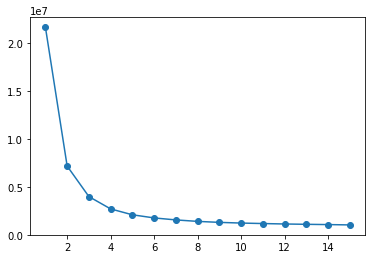

In [36]:
#find k
index = []
inertia = []
for i in range(15):
    model = KMeans(n_clusters=i+1)
    model.fit(df_dummy.loc[:,:])
    index.append(i+1)
    inertia.append(model.inertia_)
    
plt.plot(index, inertia, '-o')

In [68]:
kmeans_2 = KMeans(n_clusters=3).fit(df_dummy.loc[:,:].values)

k_2 = kmeans_2.cluster_centers_

pd_k_2 = pd.DataFrame(k_2, columns=df_dummy.columns)
pd_k_2.round(4)

,age,payment_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,male_TF_False,male_TF_True
0,30.8872,0.9350,1.3365,0.3651,2.3251,4.3749,0.0003,0.0655,0.8913,0.1087
1,47.4754,0.7305,1.3497,0.3031,2.1105,4.3300,0.0004,0.0636,0.8817,0.1183
2,63.2433,0.5422,1.3592,0.3673,1.9101,4.3873,0.0005,0.0581,0.8691,0.1309


In [70]:
sample = df_dummy.loc[:,:].sample(n=200)

for index in sample.index:
    index_in_df = int(np.argwhere(df_dummy.index==index))
    sample.loc[index,'label'] = kmeans_2.labels_[index_in_df]
    
for index in pd_k_2.index:
    pd_k_2.loc[index,'label'] = 3 
    
sample = sample.append(pd_k_2, ignore_index=False)
sample

,age,payment_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,male_TF_False,male_TF_True,label
214095,58.000000,1.000000,8.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.0
24399,33.000000,2.000000,4.000000,0.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.0
173036,77.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.0
84468,47.000000,1.000000,1.000000,0.000000,4.000000,5.000000,0.000000,0.000000,1.000000,0.000000,1.0
37392,64.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
91693,31.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.0
12544,50.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.0
0,30.887168,0.934980,1.336492,0.365120,2.325050,4.374876,0.000281,0.065531,0.891335,0.108665,3.0
1,47.475383,0.730499,1.349729,0.303132,2.110513,4.330050,0.000435,0.063595,0.881721,0.118279,3.0


In [71]:
sample['label'].unique()

array([2., 0., 1., 3.])

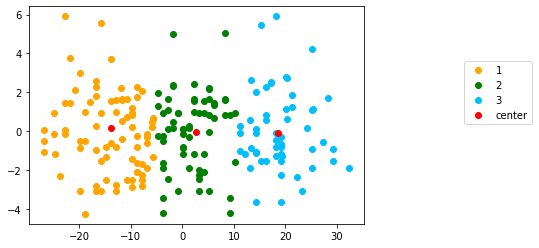

In [90]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(sample.iloc[:,:-1].values)

pos = pd.DataFrame()
pos['X'] = X[:,0]
pos['Y'] = X[:,1]
pos['label'] = sample['label'].values

ax = pos.loc[pos['label']==0]
plt.scatter(x=ax['X'], y=ax['Y'], color='orange', label='1')
ax = pos.loc[pos['label']==1]
plt.scatter(x=ax['X'], y=ax['Y'], color='green', label='2')
ax = pos.loc[pos['label']==2]
plt.scatter(x=ax['X'], y=ax['Y'], color='deepskyblue', label='3')
ax = pos.loc[pos['label']==3]
plt.scatter(x=ax['X'], y=ax['Y'], color='red', label='center')

plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=10)

In [41]:
#data cleaning
df_1 = data[['age','preferred_genre','intended_use']]

df_1.drop(df_1[np.isnan(df_1['age'])].index, inplace=True)

df_1['preferred_genre'] = df_1['preferred_genre'].fillna('null')
df_1['intended_use'] = df_1['intended_use'].fillna('null')

df_1 = df_1[~df_1['preferred_genre'].isin(['null'])]
df_1 = df_1[~df_1['intended_use'].isin(['null'])]

index = [i for i in df_1.index if (df_1.loc[i]['age'] > 12) & (df_1.loc[i]['age']<120)]
df_1 = df_1.loc[index]

#one-hot
one_hot_genre_1 = pd.get_dummies(df_1['preferred_genre'])

one_hot_intend_1 = pd.get_dummies(df_1['intended_use'])


final_data_1 = pd.concat([df_1['age'], one_hot_genre_1, one_hot_intend_1],axis=1)
final_data_1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-41-dbe547699602>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['preferred_genre'] = df_1['preferred_genre'].fillna('null')
<ipython-input-41-dbe547699602>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,age,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT
1,70.0,1,0,0,0,0,1,0,0,0,0,0,0
2,25.0,0,0,0,0,1,0,0,0,0,0,1,0
3,30.0,0,1,0,0,0,0,0,0,0,0,1,0
4,28.0,1,0,0,0,0,0,0,0,0,0,1,0
5,70.0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,43.0,0,1,0,0,0,1,0,0,0,0,0,0
227623,38.0,1,0,0,0,0,0,0,0,0,0,0,1
227624,49.0,1,0,0,0,0,0,0,0,0,0,1,0
227625,45.0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Budget Allocation

In [42]:
def time_trunc(timestr):
    time_m = timestr[0:4]+timestr[5:7]
    return time_m

In [43]:
#用advertising_spend_data
channel_spend = pd.read_excel('advertising_spend_data.xlsx')
channel_spend.set_axis(channel_spend.iloc[1],axis=1, inplace=True)
channel_spend.drop([0,1], inplace=True)
for i in channel_spend.index:
    channel_spend.loc[i,'date'] = time_trunc(str(channel_spend.loc[i,'date']))
#channel_spend.set_index([1])
channel_spend = channel_spend.transpose()
channel_spend.set_axis(channel_spend.iloc[0],axis=1, inplace=True)
channel_spend.drop('date', inplace=True)
channel_spend

date,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
1,,,,,,,,,,
facebook,84800,60000,52300,49000,51300,56100,51400,49000,49700,49100
email,75000,75600,76100,75800,76000,75900,76100,75500,76600,78000
search,17300,17300,18100,18900,21000,21400,32100,33600,30100,22700
brand sem intent google,21400,21300,21300,21300,21400,21600,22200,22700,21700,21200
affiliate,11900,12000,16300,16400,12200,11700,12100,14300,15000,17600
email_blast,10500,29800,65900,73700,32300,9800,3500,300,300,300
pinterest,5900,6000,6200,6000,6700,6300,7200,6700,6400,5900
referral,6100,6600,6800,7400,7300,7300,8000,7400,6500,10000


In [44]:
#data used:'attribution_technical', 'account_creation_date', 'discount_price', 'payment_period','join_fee'
pd_channel = data[['attribution_technical', 'account_creation_date', 'discount_price', 'payment_period','join_fee']]
pd_channel['join_fee'] = pd_channel['join_fee'].fillna(0)
#date-year+month
pd_channel.loc[:,'account_creation_date'] = pd_channel.loc[:,'account_creation_date'].apply(time_trunc)
#total cost
pd_channel.loc[:,'total_cost'] = pd_channel.loc[:,'discount_price']*pd_channel.loc[:,'payment_period']+pd_channel['join_fee']

pd_channel

<ipython-input-44-f37f079042ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_channel['join_fee'] = pd_channel['join_fee'].fillna(0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,attribution_technical,account_creation_date,discount_price,payment_period,join_fee,total_cost
0,facebook,202001,4.5141,1,0.0000,4.5141
1,facebook,202003,4.5141,1,0.3303,4.8444
2,organic,201912,4.5141,0,0.1101,0.1101
3,search,202001,4.5141,0,0.0367,0.0367
4,discovery,201910,4.5141,2,0.0367,9.0649
...,...,...,...,...,...,...
227623,facebook,201911,4.5141,1,0.3303,4.8444
227624,google_organic,201912,4.5141,1,0.3303,4.8444
227625,facebook,201912,4.5141,1,0.0367,4.5508
227626,facebook,202001,4.5141,1,0.0000,4.5141


In [45]:
#initialize 2 set，one for number of users, one for spending
channel_list = channel_spend.index

date_list = channel_spend.columns

customer_set = {}
for d in date_list:
    customer_set[str(d)] = {x:0 for x in channel_list}
    
payment_set = {}
for d in date_list:
    payment_set[str(d)] = {x:0 for x in channel_list}

for i in pd_channel.index:
    if (pd_channel.loc[i, 'attribution_technical'] in channel_list)&(pd_channel.loc[i, 'account_creation_date'] in date_list):
        customer_set[pd_channel.loc[i,'account_creation_date']][pd_channel.loc[i,'attribution_technical']] += 1
        payment_set[pd_channel.loc[i,'account_creation_date']][pd_channel.loc[i,'attribution_technical']] += \
            pd_channel.loc[i,'total_cost']

In [46]:
#count number of customer for CAC
pd_customer_set = pd.DataFrame(customer_set)
pd_customer_set.loc[:,'total'] = np.sum(pd_customer_set.loc[:, col] for col in pd_customer_set.columns)
pd_customer_set

<ipython-input-46-6e5d77951bbb>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pd_customer_set.loc[:,'total'] = np.sum(pd_customer_set.loc[:, col] for col in pd_customer_set.columns)


,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
facebook,1318,10011,9855,6129,9489,12995,9288,6289,7988,6889,80251
email,309,3260,3092,2420,2305,2584,2677,2368,3168,3507,25690
search,108,1328,1939,1852,2333,2510,3770,4073,4300,3093,25306
brand sem intent google,197,2090,1895,1530,1602,2030,2443,2626,2346,1765,18524
affiliate,78,839,1903,1065,760,509,565,1074,1480,1621,9894
email_blast,109,1510,1902,1582,977,629,411,35,66,56,7277
pinterest,37,793,637,517,682,594,851,819,680,455,6065
referral,22,528,521,582,529,587,666,584,583,568,5170


In [47]:
#count customer total consumption for CLV
pd_payment_set = pd.DataFrame(payment_set)
pd_payment_set.loc[:,'total'] = np.sum(pd_payment_set.loc[:, col] for col in pd_payment_set.columns)
pd_payment_set.round(2)

<ipython-input-47-96dbaa184de2>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pd_payment_set.loc[:,'total'] = np.sum(pd_payment_set.loc[:, col] for col in pd_payment_set.columns)


,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
facebook,2076.12,17355.65,39222.39,31090.44,52951.09,47341.64,28536.38,19553.47,23822.04,18127.71,280076.93
email,591.57,7108.02,13462.62,12759.53,13394.11,9849.18,8442.10,7283.89,9666.82,6268.91,88826.73
search,346.45,3934.94,9790.06,11013.82,14285.81,11144.10,12773.51,13619.52,14301.37,8087.54,99297.10
brand sem intent google,412.29,5226.15,8482.65,8310.64,9547.36,8216.32,7531.76,8187.99,7401.25,3734.74,67051.16
affiliate,178.18,2369.10,10181.13,6291.22,4451.23,2419.15,1710.95,3534.58,4795.77,2542.06,38473.38
email_blast,343.22,3896.88,9453.26,8618.74,5792.76,2673.12,1282.74,135.53,158.80,88.70,32443.75
pinterest,149.85,2854.78,3371.45,3312.47,4557.30,2839.04,3107.17,3064.34,2520.52,1500.55,27277.46
referral,208.31,4212.57,3924.40,4565.96,4231.14,3293.20,2714.08,2380.36,2499.05,1178.44,29207.51


In [48]:
#each channel spending
pd_spend_set = pd.DataFrame(channel_spend)
pd_spend_set.loc[:,'total'] = np.sum(pd_spend_set.loc[:, col] for col in pd_spend_set.columns)
pd_spend_set

<ipython-input-48-934c54b01041>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pd_spend_set.loc[:,'total'] = np.sum(pd_spend_set.loc[:, col] for col in pd_spend_set.columns)


date,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
1,,,,,,,,,,,
facebook,84800,60000,52300,49000,51300,56100,51400,49000,49700,49100,552700
email,75000,75600,76100,75800,76000,75900,76100,75500,76600,78000,760600
search,17300,17300,18100,18900,21000,21400,32100,33600,30100,22700,232500
brand sem intent google,21400,21300,21300,21300,21400,21600,22200,22700,21700,21200,216100
affiliate,11900,12000,16300,16400,12200,11700,12100,14300,15000,17600,139500
email_blast,10500,29800,65900,73700,32300,9800,3500,300,300,300,226400
pinterest,5900,6000,6200,6000,6700,6300,7200,6700,6400,5900,63300
referral,6100,6600,6800,7400,7300,7300,8000,7400,6500,10000,73400


In [49]:
cac = pd_spend_set.div(pd_customer_set).round(2)
cac

date,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
1,,,,,,,,,,,
facebook,64.3399,5.99341,5.30695,7.99478,5.40626,4.31705,5.53402,7.79138,6.22183,7.1273,6.88714
email,242.718,23.1902,24.6119,31.3223,32.9718,29.3731,28.4273,31.8834,24.1793,22.2412,29.6069
search,160.185,13.0271,9.33471,10.2052,9.00129,8.5259,8.51459,8.24945,7,7.33915,9.18754
brand sem intent google,108.629,10.1914,11.2401,13.9216,13.3583,10.6404,9.08719,8.64433,9.24979,12.0113,11.6659
affiliate,152.564,14.3027,8.56542,15.3991,16.0526,22.9862,21.4159,13.3147,10.1351,10.8575,14.0995
email_blast,96.3303,19.7351,34.6477,46.5866,33.0604,15.5803,8.51582,8.57143,4.54545,5.35714,31.1117
pinterest,159.459,7.5662,9.73312,11.6054,9.82405,10.6061,8.46063,8.18071,9.41176,12.967,10.4369
referral,277.273,12.5,13.0518,12.7148,13.7996,12.4361,12.012,12.6712,11.1492,17.6056,14.1973


In [50]:
clv = (pd_payment_set - pd_spend_set).div(pd_customer_set).round(2)
clv

,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
facebook,-62.7647,-4.25975,-1.327,-2.9221,0.174,-0.673979,-2.46163,-4.68223,-3.2396,-4.49591,-3.39713
email,-240.804,-21.0098,-20.2579,-26.0498,-27.1609,-25.5615,-25.2738,-28.8075,-21.1279,-20.4537,-26.1492
search,-156.977,-10.0641,-4.28569,-4.2582,-2.87792,-4.08602,-5.12639,-4.90559,-3.6741,-4.72436,-5.26369
brand sem intent google,-106.537,-7.69084,-6.76377,-8.48978,-7.39865,-6.59294,-6.00419,-5.52628,-6.09495,-9.89533,-8.04626
affiliate,-150.28,-11.479,-3.21538,-9.49181,-10.1957,-18.2335,-18.3877,-10.0237,-6.89475,-9.28929,-10.2109
email_blast,-93.1815,-17.1544,-29.6776,-41.1386,-27.1313,-11.3305,-5.3948,-4.69905,-2.13938,-3.77314,-26.6533
pinterest,-155.41,-3.96623,-4.44043,-5.19832,-3.14179,-5.82653,-4.80944,-4.43915,-5.70512,-9.66911,-5.93941
referral,-267.804,-4.52164,-5.51938,-4.86949,-5.80124,-6.82589,-7.93682,-8.59527,-6.86269,-15.5309,-8.54787


In [64]:
#churn

In [51]:
import statsmodels.api as sm
from sklearn import model_selection

In [95]:
data_copy = data.copy()
data_copy['cancel_date'] = data_copy['cancel_date'].fillna(-1)

for i in data_copy.index:
    #non-churn: payment_period & cancel_date
    if data_copy.at[i, 'payment_period'] & (data_copy.at[i, 'cancel_date']==-1):
        data_copy.at[i, 'churn_TF'] = False
    #churn: payment_period & no cancel_date
    elif data_copy.at[i, 'payment_period'] & (data_copy.at[i, 'cancel_date']!=-1):
        data_copy.at[i, 'churn_TF'] = True
        
data_copy

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn_TF
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,-1,True,False
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,-1,True,False
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,ar,NaN,14,False,0,NaN,NaN,-1,True,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,ar,NaN,14,False,0,NaN,NaN,-1,True,NaN
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,-1,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,-1,True,False
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,-1,True,False
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,-1,True,False
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,-1,True,False


In [96]:
#data for regression
df_churn = data_copy[['subid', 'age', 'weekly_consumption_hour', 'discount_price', 'male_TF','churn_TF']]

df_churn['engagement'] = False
df_churn = df_churn.join(pd.DataFrame(0, columns=['app_opens', 'cust_service_mssgs', 'num_videos_completed', \
                                          'num_videos_more_than_30_seconds', 'num_videos_rated', 'num_series_started'], index=df_churn.index))

<ipython-input-96-c6d1c1742ebb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['engagement'] = False


In [97]:
#engage
engage = pd.read_pickle('engagement')

s = engage.groupby('subid').sum()

subid_list = list(df_churn['subid'])
for i in s.index:
    if i in subid_list:
        index = df_churn[df_churn.subid == i].index.tolist()[0]
        df_churn.at[index, 'engagement'] = True
        df_churn.at[index, 'app_opens'] += s.at[i, 'app_opens']
        df_churn.at[index, 'cust_service_mssgs'] += s.at[i, 'cust_service_mssgs']
        df_churn.at[index, 'num_videos_completed'] += s.at[i, 'num_videos_completed']
        df_churn.at[index, 'num_videos_more_than_30_seconds'] += s.at[i, 'num_videos_more_than_30_seconds']
        df_churn.at[index, 'num_videos_rated'] += s.at[i, 'num_videos_rated']
        df_churn.at[index, 'num_series_started'] += s.at[i, 'num_series_started']

In [98]:
#data clean
df_churn_copy = df_churn.copy()

#male，age 0-1
for i in df_churn_copy.index:
    if df_churn_copy.at[i, 'churn_TF']==True:
        df_churn_copy.at[i, 'churn_TF']=1
    elif df_churn_copy.at[i, 'churn_TF']==False:
        df_churn_copy.at[i, 'churn_TF']=0  
    else:
        df_churn_copy.at[i, 'churn_TF']=-1
        
    if df_churn_copy.at[i, 'male_TF']==True:
        df_churn_copy.at[i, 'male_TF']=1
    elif df_churn_copy.at[i, 'male_TF']==False:
        df_churn_copy.at[i, 'male_TF']=0
    else:
        df_churn_copy.at[i, 'male_TF']=-1
        
drop_index = [i for i in df_churn_copy.index if (df_churn_copy.at[i, 'churn_TF']==-1) or (df_churn_copy.at[i, 'male_TF']==-1)]

df_churn_copy.drop(drop_index, inplace=True)
df_churn_copy.drop(df_churn_copy[np.isnan(df_churn_copy['age'])].index, inplace=True)
df_churn_copy.drop(df_churn_copy[np.isnan(df_churn_copy['weekly_consumption_hour'])].index, inplace=True)


df_churn_copy

,subid,age,weekly_consumption_hour,discount_price,male_TF,churn_TF,engagement,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
1,23383224,70.0,22.951579,4.5141,0,0,False,0,0,0,0,0,0
5,24810928,70.0,20.051667,4.5141,0,0,False,0,0,0,0,0,0
6,29726122,61.0,20.051667,4.5141,0,0,True,40,17,182,182,6,39
7,20299962,23.0,34.551230,4.5141,0,0,True,104,10,84,206,0,29
8,24930568,73.0,25.851492,4.5141,0,0,True,3,3,2,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,25549852,61.0,28.751405,4.5141,0,0,True,1,2,0,6,0,0
227622,25835684,43.0,24.401536,4.5141,0,0,True,31,5,47,59,0,8
227623,21434712,38.0,28.751405,4.5141,0,0,True,16,3,20,36,0,2
227624,25843074,49.0,27.301448,4.5141,0,0,True,72,15,39,122,0,15


In [105]:
df_train, df_test = model_selection.train_test_split(df_churn_copy, test_size=0.3)

y_col_name = 'churn_TF' 
x_col_name = ['age', 'weekly_consumption_hour', 'discount_price', 'male_TF']#, 'app_opens', 'cust_service_mssgs', 'num_videos_completed', \
                                        #  'num_videos_more_than_30_seconds', 'num_videos_rated', 'num_series_started']  
add_constant_TF = True

if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

# linear regression
lpm_results = sm.OLS(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float)).fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     49.82
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.53e-42
Time:                        00:13:55   Log-Likelihood:                -12475.
No. Observations:               50432   AIC:                         2.496e+04
Df Residuals:                   50427   BIC:                         2.500e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [106]:
# logistic regression and linear regression results match
logit_results = sm.Logit(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float)).fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.341062
         Iterations 12

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                50432
Model:                          Logit   Df Residuals:                    50427
Method:                           MLE   Df Model:                            4
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                0.004183
Time:                        00:14:01   Log-Likelihood:                -17200.
converged:                       True   LL-Null:                       -17273.
Covariance Type:            nonrobust   LLR p-value:                 3.065e-30
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                     -1.058e-05   2.59e-05   

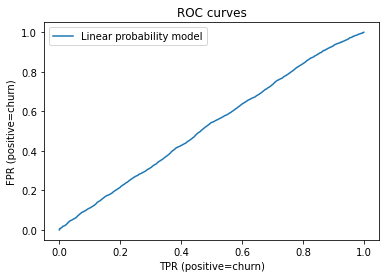

In [144]:
from sklearn.metrics import roc_curve, auc

df_train, df_test = model_selection.train_test_split(df_churn_copy, test_size=0.3)

y_col_name = 'churn_TF' 
x_col_name = ['age', 'weekly_consumption_hour', 'discount_price', 'male_TF']

add_constant_TF = True

if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)
    
y_label = df_train['churn_TF'] 
y_pre = lpm_results.predict(df_train[x_col_name])
#y_pre = logit_results.predict(df_train[x_col_name])

fpr, tpr, thersholds = roc_curve(list(y_label), list(y_pre))

roc_auc = auc(fpr, tpr)

plt.title('ROC curves')
plt.xlabel('TPR (positive=churn)')
plt.ylabel('FPR (positive=churn)')
plt.plot(fpr, tpr, '-', label='ROC (area = {0:.2f})'.format(roc_auc))

plt.legend(labels=['Linear probability model'])

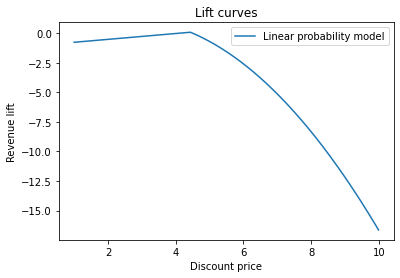

In [127]:
df_train, df_test = model_selection.train_test_split(df_churn_copy, test_size=0.3)

y_col_name = 'churn_TF' 
x_col_name = ['age', 'weekly_consumption_hour', 'discount_price', 'male_TF']#, 'app_opens', 'cust_service_mssgs', 'num_videos_completed', \
                                        #  'num_videos_more_than_30_seconds', 'num_videos_rated', 'num_series_started']  
add_constant_TF = True

if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)
    
# prediction method:linear regression
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_lpm'] = df_test['prob_churn_lpm'].apply(lambda x: 0 if x<0 else x)

base_revenue = (df_test.loc[:, 'discount_price']*(1-df_test.loc[:, 'prob_churn_lpm'])).sum()
revenue_list = []
x_list = []
churn_prob = []
# count the benefit for 1-5$
for i in range(100, 1000, 1):
    x = i/100
    df_test['discount_price'] = x
    df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
    df_test['prob_churn_lpm'] = df_test['prob_churn_lpm'].apply(lambda x: 0 if x<0 else x)
    revenue = (df_test.loc[:, 'discount_price']*(1-df_test.loc[:, 'prob_churn_lpm'])).sum()
    revenue_lift = (revenue-base_revenue) / base_revenue
    
    revenue_list.append(revenue_lift)
    x_list.append(x)
    churn_prob.append( df_test['prob_churn_lpm'].mean())
    
plt.plot(x_list, revenue_list, '-')
plt.title('Lift curves')
plt.xlabel('Discount price')
plt.ylabel('Revenue lift')
plt.legend(labels=['Linear probability model'])


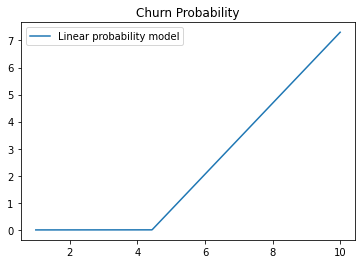

In [128]:
plt.plot(x_list, churn_prob, '-')
plt.title('Churn Probability')
plt.legend(labels=['Linear probability model'])
